In [67]:
# import to invoke required module

# import pandas, pd is an alias
import pandas as pd

# import numpy, np is an alias
import numpy as np

# import seaborn, sns is an alias
import seaborn as sns

# import matplotlib.pyplot, plt is an alias
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.preprocessing import PowerTransformer

#Sklearn for clustering
import sklearn

#import train test split
from sklearn.model_selection import train_test_split


#importing Standard Scalar
from sklearn.preprocessing import StandardScaler


#Kmean Clustering
from sklearn.cluster import KMeans


#Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


#importing PCA Clustering
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#Applying Logistical regression on the data on our PCA
from sklearn.linear_model import LogisticRegression

#Metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import silhouette_score


In [68]:
# Path where all Dataset are located

dfTrace = pd.read_csv("/Users/rparama/Downloads/Dataset/TraceAgg.csv")
dfTrace.head(10)

,token_address,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,...,transaction_from_address,transaction_to_address,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address
0,0x0000000000b3f879cb30fe243b4dfee438691c04,Gastoken.io,0.0,False,4,4,0.0,1.272665e+08,1.258158e+08,2,...,2,2,0.000000e+00,256089852,69400000000,7567350,252218296,2.0,1.292323e+07,2
1,0x0000000000b3f879cb30fe243b4dfee438691c04,Gastoken.io,1.0,False,4,2,0.0,4.419811e+06,1.113697e+06,3,...,3,1,0.000000e+00,5901184,12008000000,543034,3107288,2.0,1.292323e+07,1
2,0x06c6fe422a4e2a1c68d16ee3a798552ba5b670ac,Test 2,0.0,True,1,1,0.0,5.536160e+05,5.657800e+04,1,...,1,1,0.000000e+00,600000,46000001024,57481,72962,4.0,1.000000e+18,1
3,0x0781311fde517339d24d749db3fa8b236de5417e,Pontos,1.0,True,1,1,0.0,1.260098e+08,2.923630e+06,6,...,1,1,0.000000e+00,129000000,2523000000000,1395666,5467002,18.0,1.000000e+21,1
4,0x09eb38b9b29c2c0b96f81fce3bb13bd4c96c2ee7,DanCoin,1.0,True,1,1,0.0,1.061990e+05,6.744000e+04,1,...,1,1,0.000000e+00,173983,4000000000,559594,135224,5.0,3.500000e+15,1
5,0x0b5fa328278442956d405d8b501571e20b96260e,AMIS,1.0,True,1,1,0.0,2.753370e+05,3.642500e+04,1,...,1,1,0.000000e+00,305748,1000000000,272815,203832,9.0,6.604740e+05,1
6,0x15c374190b550a56621576209c2e722821286bbc,TheDanCoin,1.0,True,4,1,0.0,2.387812e+08,1.369276e+06,4,...,4,2,0.000000e+00,240897096,1537600000000,1894935,3631371,5.0,3.999998e+15,1
7,0x171040cd10f204f3b257e45b41ce65d36150558c,eBOMB,0.0,True,140,1,0.0,5.841082e+08,1.445470e+08,203,...,222,3,2.419481e+20,737026296,23042249721858,7999635,392263464,18.0,2.099851e+25,1
8,0x171040cd10f204f3b257e45b41ce65d36150558c,eBOMB,1.0,False,26,13,0.0,2.264384e+11,1.516478e+10,26,...,15,11,0.000000e+00,438497900280,154739868000000,7958083,435874540404,18.0,2.099851e+25,11
9,0x171040cd10f204f3b257e45b41ce65d36150558c,eBOMB,1.0,True,70,1,0.0,2.156650e+11,4.006560e+09,153,...,236,14,2.026072e+19,430770635684,162805676059392,7958083,428057806970,18.0,2.099851e+25,1


In [69]:
dfTrace = dfTrace.drop(19)

In [70]:
dfTrace.reset_index(inplace=True, drop=True)

In [71]:
# File metadata/Schema analysis

i=1
headers=PrettyTable(["S.No",
                     "Column Name",
                     "Data Type",
                     "Record Count",
                     "Unique Count",
                     "Null Count",
                     "Total Count"])

for col in dfTrace.columns:
    headers.add_row([i,
                     col,
                     dfTrace[col].dtypes,
                     dfTrace[col].count(),
                     dfTrace[col].nunique(),
                     dfTrace[col].isnull().sum(),
                     dfTrace[col].count()+dfTrace[col].isnull().sum()])
    i+=1

print(headers)

+------+-----------------------------+-----------+--------------+--------------+------------+-------------+
| S.No |         Column Name         | Data Type | Record Count | Unique Count | Null Count | Total Count |
+------+-----------------------------+-----------+--------------+--------------+------------+-------------+
|  1   |        token_address        |   object  |      39      |      30      |     0      |      39     |
|  2   |          token_name         |   object  |      39      |      26      |     0      |      39     |
|  3   |        receipt_status       |  float64  |      39      |      2       |     0      |      39     |
|  4   |      Contract_is_erc20      |    bool   |      39      |      2       |     0      |      39     |
|  5   |      trace_from_address     |   int64   |      39      |      13      |     0      |      39     |
|  6   |       trace_to_address      |   int64   |      39      |      8       |     0      |      39     |
|  7   |         trace_value

# Encoding

In [72]:
# performing Encoding on Binary varaible receipt_status,Contract_is_erc20

dfTrace['Contract_is_erc20'] = dfTrace['Contract_is_erc20'].astype(int)
dfTrace['receipt_status'] = dfTrace['receipt_status'].astype(int)

In [73]:

dfTrace.drop(['token_address'], axis=1, inplace=True)


In [74]:
dfTrace.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,transaction_from_address,transaction_to_address,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2,2,0.0,256089852,69400000000,7567350,252218296,2.0,1.292323e+07,2
1,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,3,1,0.0,5901184,12008000000,543034,3107288,2.0,1.292323e+07,1
2,Test 2,0,1,1,1,0.0,553616.0,56578.0,1,2,...,1,1,0.0,600000,46000001024,57481,72962,4.0,1.000000e+18,1
3,Pontos,1,1,1,1,0.0,126009768.0,2923630.0,6,60,...,1,1,0.0,129000000,2523000000000,1395666,5467002,18.0,1.000000e+21,1
4,DanCoin,1,1,1,1,0.0,106199.0,67440.0,1,2,...,1,1,0.0,173983,4000000000,559594,135224,5.0,3.500000e+15,1


# Scaling

In [75]:
# Putting response variable to y
y = dfTrace[['token_name']]

# Putting feature variable to X
X = dfTrace[['receipt_status', 
             'Contract_is_erc20',
             'trace_from_address', 
             'trace_to_address', 
             'trace_value', 
             'trace_gas',
             'trace_gas_used', 
             'token_transfer_from_address',
             'token_transfer_to_address', 
             'token_transfer_value',
             'transaction_from_address', 
             'transaction_to_address',
             'transaction_value', 
             'transaction_gas', 
             'transaction_gas_price',
             'receipt_cumulative_gas_used', 
             'receipt_gas_used', 
             'token_decimals',
             'token_total_supply', 
             'Contract_address']]



In [76]:
X.head()

,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,token_transfer_value,transaction_from_address,transaction_to_address,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address
0,0,0,4,4,0.0,127266471.0,125815805.0,2,1,6.800000e+03,2,2,0.0,256089852,69400000000,7567350,252218296,2.0,1.292323e+07,2
1,1,0,4,2,0.0,4419811.0,1113697.0,3,3,2.000000e+05,3,1,0.0,5901184,12008000000,543034,3107288,2.0,1.292323e+07,1
2,0,1,1,1,0.0,553616.0,56578.0,1,2,2.000000e+18,1,1,0.0,600000,46000001024,57481,72962,4.0,1.000000e+18,1
3,1,1,1,1,0.0,126009768.0,2923630.0,6,60,3.620030e+05,1,1,0.0,129000000,2523000000000,1395666,5467002,18.0,1.000000e+21,1
4,1,1,1,1,0.0,106199.0,67440.0,1,2,6.000000e+14,1,1,0.0,173983,4000000000,559594,135224,5.0,3.500000e+15,1


In [77]:
y.head()

,token_name
0,Gastoken.io
1,Gastoken.io
2,Test 2
3,Pontos
4,DanCoin


In [78]:
# instantiate
scaler = StandardScaler()


In [79]:
# fit_transform
X = scaler.fit_transform(X)


In [80]:
X.max()

6.164413636963331

# PCA

In [81]:
#PCA Model
pca=PCA(svd_solver='randomized', random_state=42)


In [82]:
#performing PCA and object instanciate
pca.fit(X)


PCA(random_state=42, svd_solver='randomized')

In [83]:
#PCA components
pca.components_


array([[ 8.04633275e-02, -1.19822237e-01,  2.41809237e-01,
         1.41191937e-01,  7.05457119e-02,  2.98589719e-01,
         2.44074849e-01,  2.41046814e-01,  1.98002404e-02,
         2.96218241e-01,  2.57216154e-01,  2.98544054e-01,
         1.20117585e-01,  3.00475210e-01,  3.25065179e-01,
         2.68870735e-01,  2.98720612e-01,  1.97950416e-01,
        -1.24715205e-02,  1.85149838e-01],
       [-1.60319622e-01,  3.13536308e-01,  3.51005696e-01,
        -2.55697681e-01, -1.55973679e-01, -1.33354440e-01,
        -2.37879800e-01,  3.77278083e-01,  5.51525265e-02,
         1.64615356e-01,  3.12765341e-01, -3.41176041e-02,
         4.20578446e-01, -1.32949494e-01, -1.16581435e-01,
         3.01949254e-02, -1.36251743e-01,  6.15877127e-02,
        -5.12403566e-02, -2.88436211e-01],
       [-1.25265904e-01, -2.38771256e-01,  1.57347637e-01,
         4.40403537e-01,  4.64196602e-01, -2.68774655e-01,
        -2.17781896e-01,  7.50262745e-02, -5.09562163e-02,
        -4.98302549e-03, -3.5

In [84]:
#Variance explained by the PCA
pca.explained_variance_ratio_


array([3.96454048e-01, 1.72971236e-01, 1.45728479e-01, 6.40851051e-02,
       5.91725141e-02, 4.15055595e-02, 3.79381867e-02, 3.01331104e-02,
       2.08527210e-02, 1.66049855e-02, 7.59434541e-03, 3.90399272e-03,
       2.11547920e-03, 6.83081329e-04, 1.78234628e-04, 6.14214243e-05,
       1.47521812e-05, 2.73465776e-06, 1.20030902e-08, 7.00460888e-10])

# Scree Plot

<BarContainer object of 20 artists>

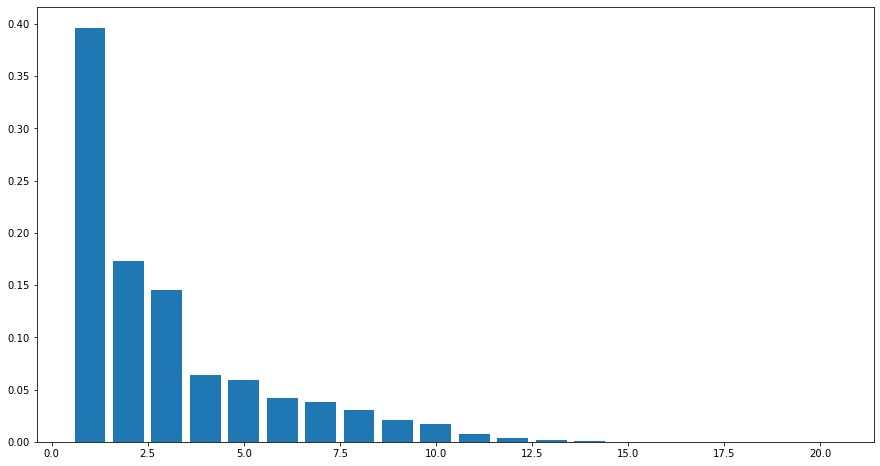

In [85]:
#Bar chart of Variance Explained by PCA
fig = plt.figure(figsize=[15,8])
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)


In [86]:
#Cumulative Calcuation
var_cumu = np.cumsum(pca.explained_variance_ratio_)


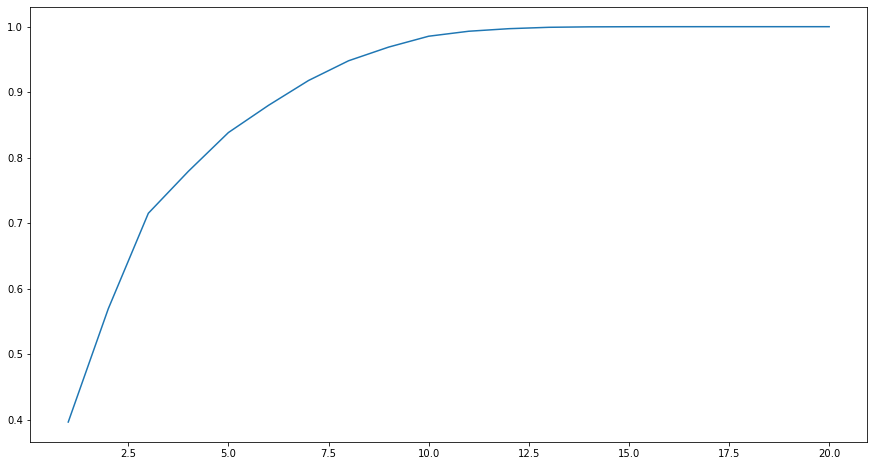

In [87]:
#Plotting the Scree Plot
fig = plt.figure(figsize=[15,8])
plt.plot(range(1,len(var_cumu)+1),var_cumu)


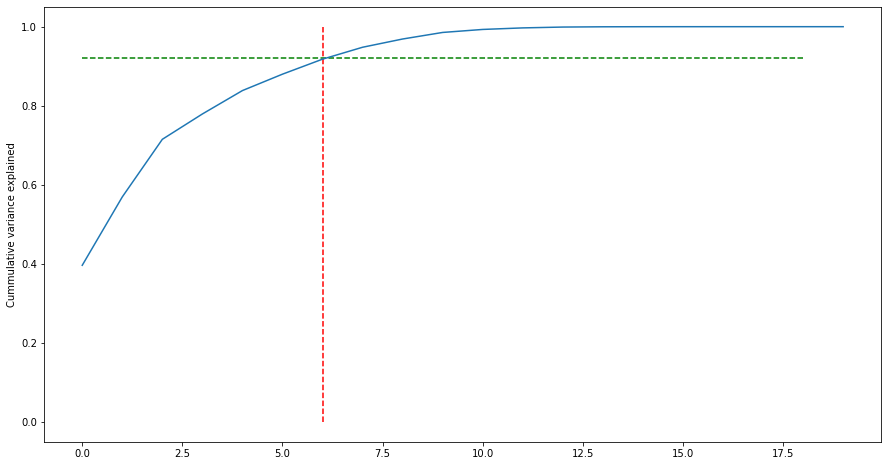

In [92]:

#Scree Plot with axis
fig = plt.figure(figsize=[15,8])
plt.plot(var_cumu)
plt.hlines(y=0.92, xmax=18, xmin=0, colors="g", linestyles="--")
plt.vlines(x=6, ymax=1, ymin=0, colors="r", linestyles="--")
plt.ylabel("Cummulative variance explained")
plt.show()


# Perform PCA with 5 components

In [93]:
# dimenstionality reduction
pca_final = IncrementalPCA(n_components=6)

In [94]:
#Transforming the data
df_pca = pca_final.fit_transform(X)

In [95]:
df_pca.shape

(39, 6)

In [96]:
#Print the resulatant PCs here
df_pca[:10]

array([[-0.61264007, -0.65924322,  0.84997351, -0.58888145, -0.08171211,
        -1.59394192],
       [-1.29830439, -0.77146656, -0.08834472,  0.47495756,  0.08656889,
        -0.59905242],
       [-1.79453673,  0.29345788, -0.43309427, -0.61151516, -0.67790946,
        -0.48631493],
       [-0.96955195,  0.17709505,  0.09515148,  0.75277656,  0.1688535 ,
         1.2270376 ],
       [-1.55332527, -0.01653315, -0.6100638 ,  0.1320648 ,  0.11098063,
         0.53235356],
       [-1.43512983,  0.025051  , -0.42207489,  0.34465009,  0.07452599,
         0.75929795],
       [-1.25628269,  0.06700467, -0.50855051,  0.07358057,  0.2265593 ,
         0.64055732],
       [ 5.08331902,  8.75889595,  2.60563687,  0.5416989 , -0.7472609 ,
        -1.8587681 ],
       [ 9.04520643, -4.22430192, -0.48280113,  0.14911566, -1.18776491,
        -0.23935606],
       [ 9.49901609,  2.64809283, -2.20165003,  0.28657153, -0.25093445,
         2.23529785]])

In [97]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [99]:
# Create a dataframe with the PCs obtained
pca_df2 = pd.DataFrame({"PC1":pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3], 'PC5':pc[4], 'PC6':pc[5]})

In [100]:
# Check the head of the resultant data
pca_df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942
1,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052
2,-1.794537,0.293458,-0.433094,-0.611515,-0.677909,-0.486315
3,-0.969552,0.177095,0.095151,0.752777,0.168853,1.227038
4,-1.553325,-0.016533,-0.610064,0.132065,0.110981,0.532354


In [101]:
y.head()

,token_name
0,Gastoken.io
1,Gastoken.io
2,Test 2
3,Pontos
4,DanCoin


In [102]:
#Let's add back the address to the given principal components
pca_df2 = pd.concat([pca_df2, y], axis=1)
pca_df2.head()

,PC1,PC2,PC3,PC4,PC5,PC6,token_name
0,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942,Gastoken.io
1,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052,Gastoken.io
2,-1.794537,0.293458,-0.433094,-0.611515,-0.677909,-0.486315,Test 2
3,-0.969552,0.177095,0.095151,0.752777,0.168853,1.227038,Pontos
4,-1.553325,-0.016533,-0.610064,0.132065,0.110981,0.532354,DanCoin


In [103]:
#check for nulls
pca_df2.isnull().any()

PC1           False
PC2           False
PC3           False
PC4           False
PC5           False
PC6           False
token_name    False
dtype: bool

# Outlier Treatment

In [104]:
pca_df2.describe(percentiles=[.05,.10,.25, .5, .75, .90, .95, .99])

,PC1,PC2,PC3,PC4,PC5,PC6
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,-1.594166e-16,4.981770e-17,-2.846726e-17,1.352195e-17,-7.045646e-17,3.131398e-17
std,2.852673e+00,1.884267e+00,1.729528e+00,1.146922e+00,1.102086e+00,9.230147e-01
min,-1.857587e+00,-4.224302e+00,-3.544579e+00,-1.712831e+00,-1.187765e+00,-2.400916e+00
5%,-1.794716e+00,-2.464115e+00,-2.301898e+00,-7.591352e-01,-6.960836e-01,-1.620425e+00
10%,-1.760471e+00,-1.944576e+00,-7.380480e-01,-6.427698e-01,-6.846798e-01,-1.138942e+00
25%,-1.609431e+00,-1.623814e-01,-5.503300e-01,-6.010237e-01,-6.496700e-01,-4.861049e-01
50%,-1.298304e+00,6.700467e-02,-4.079224e-01,6.142496e-02,-1.322384e-02,-2.188961e-01
75%,3.838068e-01,3.375881e-01,7.544376e-02,2.428869e-01,1.062052e-01,6.097337e-01
90%,4.229035e+00,6.018924e-01,1.027447e+00,4.883058e-01,5.439181e-01,9.423420e-01


# PC1 - outlier treatment

PC1 - Total Number of Records 39, After record dropping 4, Percentage dropped 10.26%


<AxesSubplot:ylabel='PC1'>

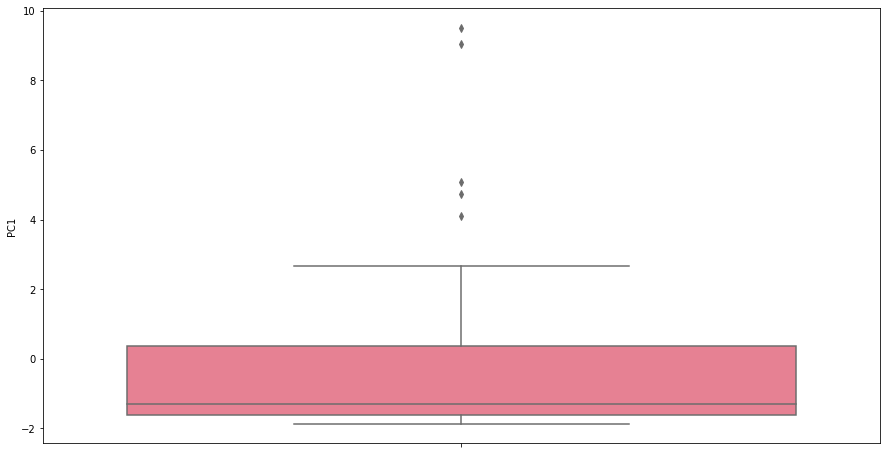

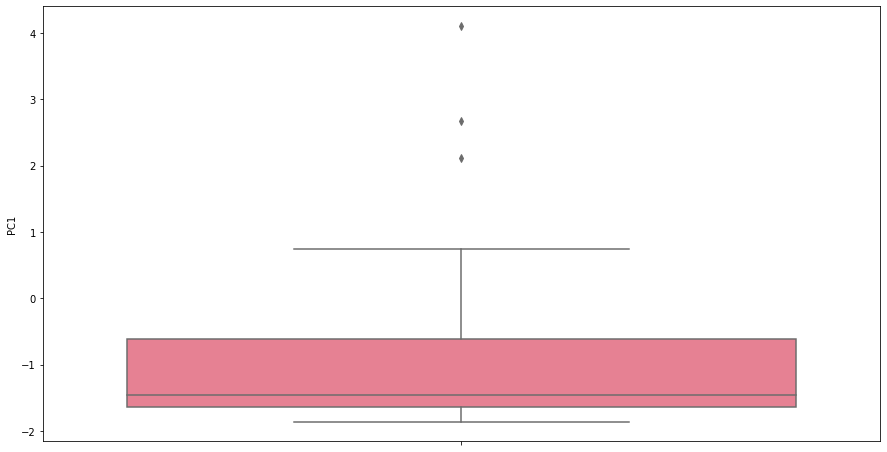

In [105]:
#BoxPlot before dropping

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(y=pca_df2['PC1'],  palette="husl")


# Dropped records Percentage Calcualtion
print("PC1 - Total Number of Records {0}, After record dropping {1}, Percentage dropped {2}%".format(pca_df2.PC1.count(), 
                                                                                                     pca_df2.PC1.count() - pca_df2[(pca_df2.PC1 <= pca_df2.PC1.quantile(0.90)) ].PC1.count(), 
                                                                                                     round(100 * (1 - pca_df2[(pca_df2.PC1 <= pca_df2.PC1.quantile(0.90))].PC1.count() / pca_df2.PC1.count()),2)))


#BoxPlot after dropping
plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(y=pca_df2[(pca_df2.PC1 <= pca_df2.PC1.quantile(0.90))].PC1,  palette="husl")



# PC2 - Outlier treatment

<AxesSubplot:ylabel='PC2'>

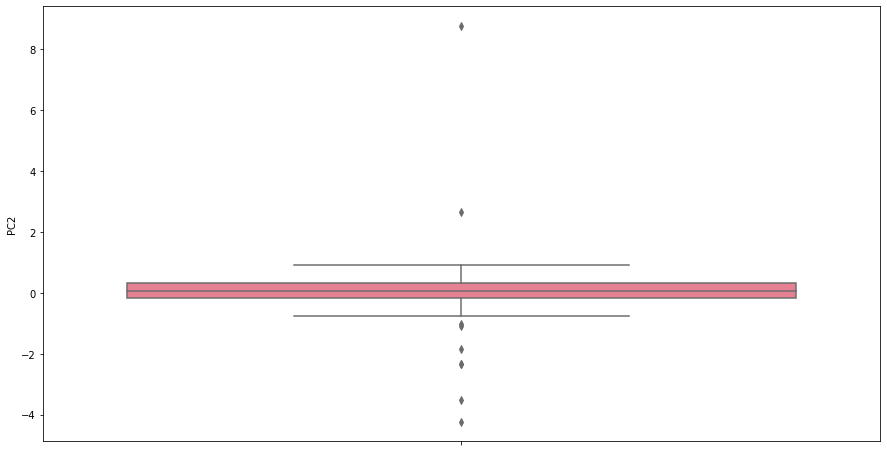

In [106]:
#BoxPlot before dropping

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(y=pca_df2['PC2'],  palette="husl")


# PC3 - Outlier treatment

PC3 - Total Number of Records 39, After record dropping 4, Percentage dropped 10.26%


<AxesSubplot:ylabel='PC3'>

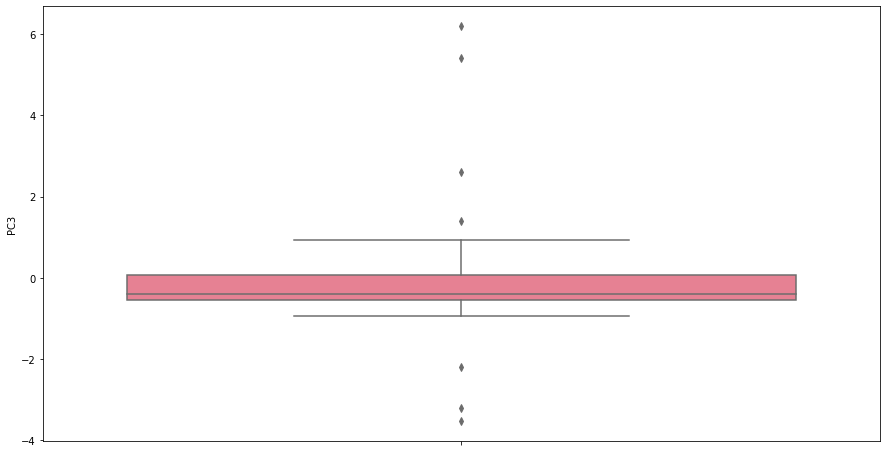

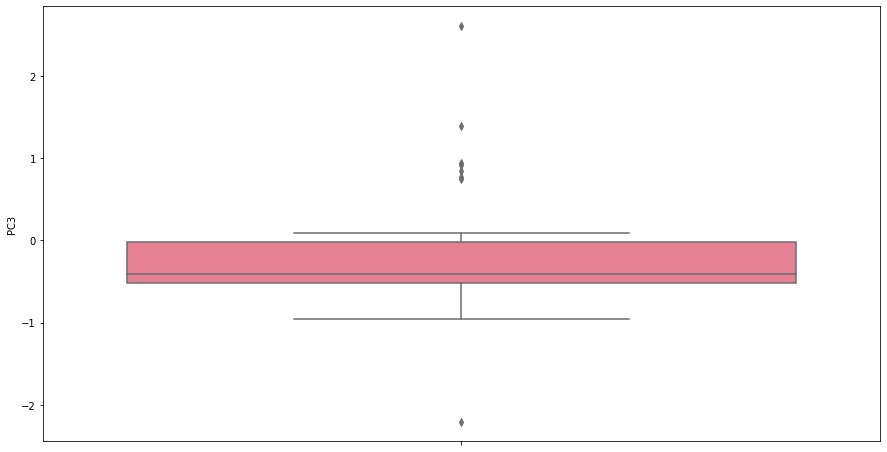

In [107]:
#BoxPlot before dropping

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(y=pca_df2['PC3'],  palette="husl")

# Dropped records Percentage Calcualtion
print("PC3 - Total Number of Records {0}, After record dropping {1}, Percentage dropped {2}%".format(pca_df2.PC3.count(), pca_df2.PC3.count() - pca_df2[(pca_df2.PC3 >= pca_df2.PC3.quantile(0.05)) & (pca_df2.PC3 <= pca_df2.PC3.quantile(0.95))].PC3.count(), round(100 * (1 - pca_df2[(pca_df2.PC3 >= pca_df2.PC3.quantile(0.05)) & (pca_df2.PC3 <= pca_df2.PC3.quantile(0.95))].PC3.count() / pca_df2.PC3.count()),2)))


#BoxPlot after dropping
plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(y=pca_df2[(pca_df2.PC3 >= pca_df2.PC3.quantile(0.05)) & (pca_df2.PC3 <= pca_df2.PC3.quantile(0.95))].PC3,  palette="husl")


# The given data good for performing Clustering is "Good"

In [108]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [109]:
hopkins(pca_df2.drop('token_name',axis=1))

0.971214673264458

In [110]:
# Now for perfroming clustering, we need to again drop the address column, Let's drop it
dat3_1 = pca_df2.drop('token_name',axis=1)

In [111]:
# Check the shape of the resultant data
dat3_1.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942
1,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052
2,-1.794537,0.293458,-0.433094,-0.611515,-0.677909,-0.486315
3,-0.969552,0.177095,0.095151,0.752777,0.168853,1.227038
4,-1.553325,-0.016533,-0.610064,0.132065,0.110981,0.532354


# Silhouette Analysis

In [112]:
#Silhouette score Analysis

range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    cluster_labels = kmeans.labels_
    
    #silhouette score
    silhouette_avg = silhouette_score(dat3_1,cluster_labels)
    print("for n_cluster={0}, the Silhouette score is {1}".format(num_clusters,silhouette_avg))

for n_cluster=2, the Silhouette score is 0.6289299393428389
for n_cluster=3, the Silhouette score is 0.6322147551047878
for n_cluster=4, the Silhouette score is 0.6359613381214638
for n_cluster=5, the Silhouette score is 0.629071360456077
for n_cluster=6, the Silhouette score is 0.6256445138646882
for n_cluster=7, the Silhouette score is 0.6315664849198775
for n_cluster=8, the Silhouette score is 0.6331100144639584
for n_cluster=9, the Silhouette score is 0.40887755900447276


### for n_cluster=2, the Silhouette score is 0.8225412351447678

# SSD / Elbow curve

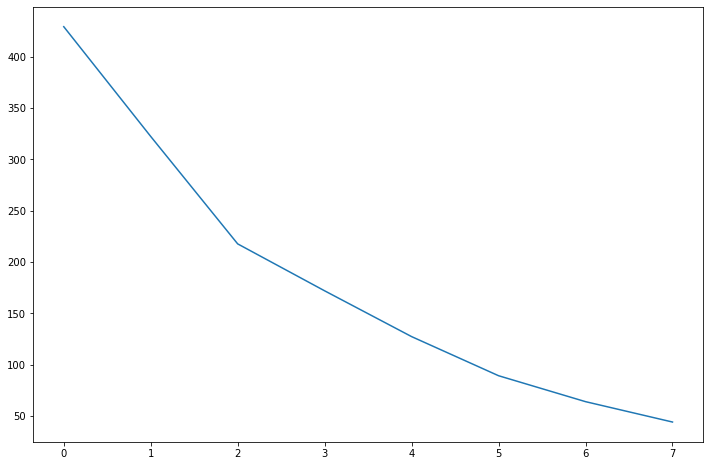

In [113]:
#elbow curve/SSD

ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dat3_1)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.subplots(figsize=(12,8), sharex=True)
plt.plot(ssd)
plt.show()

# KMeans with the K

In [114]:

#Kmeans using K
model_clus2 = KMeans(n_clusters=4, max_iter=50, random_state=50)
model_clus2.fit(dat3_1)


KMeans(max_iter=50, n_clusters=4, random_state=50)

In [115]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index',axis=1), pd.Series(model_clus2.labels_)],axis=1)
dat_km.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','token_name','KClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,PC6,token_name,KClusterID
0,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942,Gastoken.io,1
1,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052,Gastoken.io,1
2,-1.794537,0.293458,-0.433094,-0.611515,-0.677909,-0.486315,Test 2,1
3,-0.969552,0.177095,0.095151,0.752777,0.168853,1.227038,Pontos,1
4,-1.553325,-0.016533,-0.610064,0.132065,0.110981,0.532354,DanCoin,1


In [116]:
# Check the count of observation per cluster
dat_km['KClusterID'].value_counts()

1    32
2     4
3     2
0     1
Name: KClusterID, dtype: int64

In [117]:
dat_km

,PC1,PC2,PC3,PC4,PC5,PC6,token_name,KClusterID
0,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942,Gastoken.io,1
1,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052,Gastoken.io,1
2,-1.794537,0.293458,-0.433094,-0.611515,-0.677909,-0.486315,Test 2,1
3,-0.969552,0.177095,0.095151,0.752777,0.168853,1.227038,Pontos,1
4,-1.553325,-0.016533,-0.610064,0.132065,0.110981,0.532354,DanCoin,1
5,-1.435130,0.025051,-0.422075,0.344650,0.074526,0.759298,AMIS,1
6,-1.256283,0.067005,-0.508551,0.073581,0.226559,0.640557,TheDanCoin,1
7,5.083319,8.758896,2.605637,0.541699,-0.747261,-1.858768,eBOMB,0
8,9.045206,-4.224302,-0.482801,0.149116,-1.187765,-0.239356,eBOMB,2
9,9.499016,2.648093,-2.201650,0.286572,-0.250934,2.235298,eBOMB,2


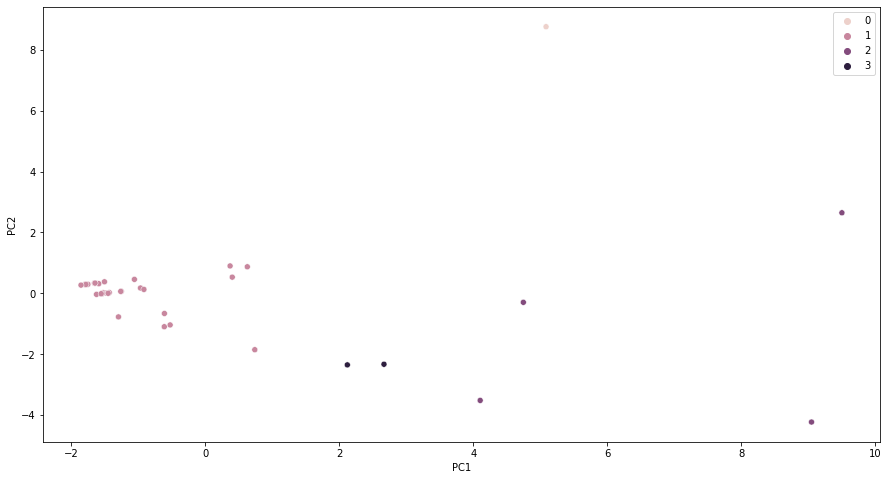

In [118]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC1', y='PC2', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

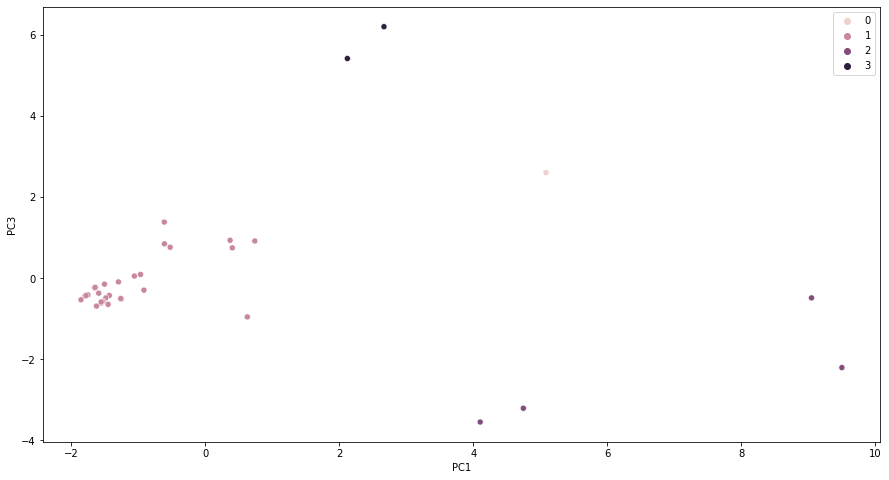

In [119]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC1', y='PC3', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

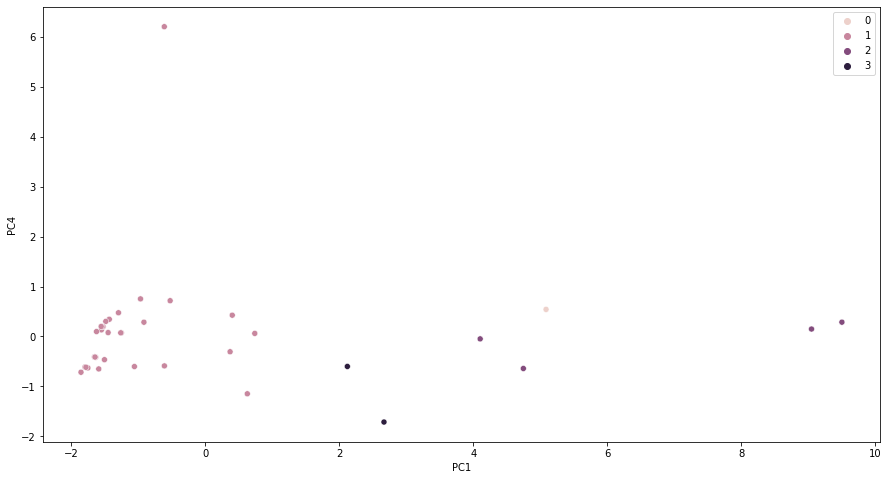

In [120]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC1', y='PC4', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

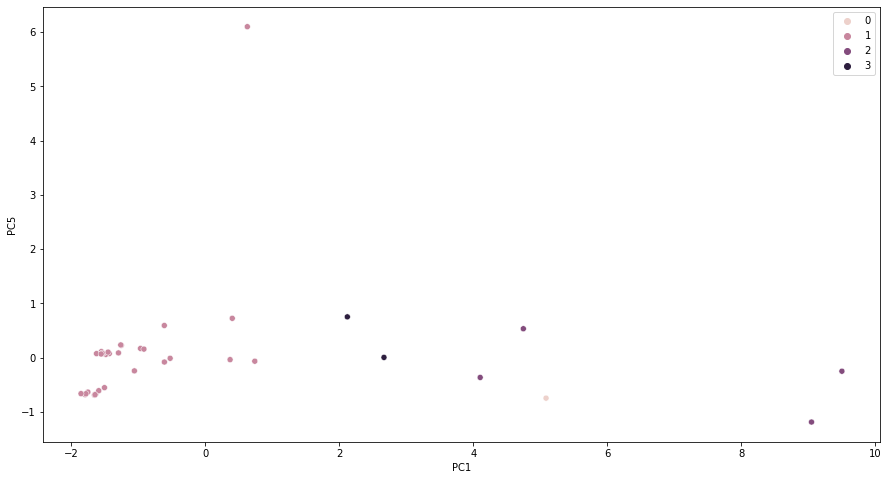

In [121]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC1', y='PC5', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

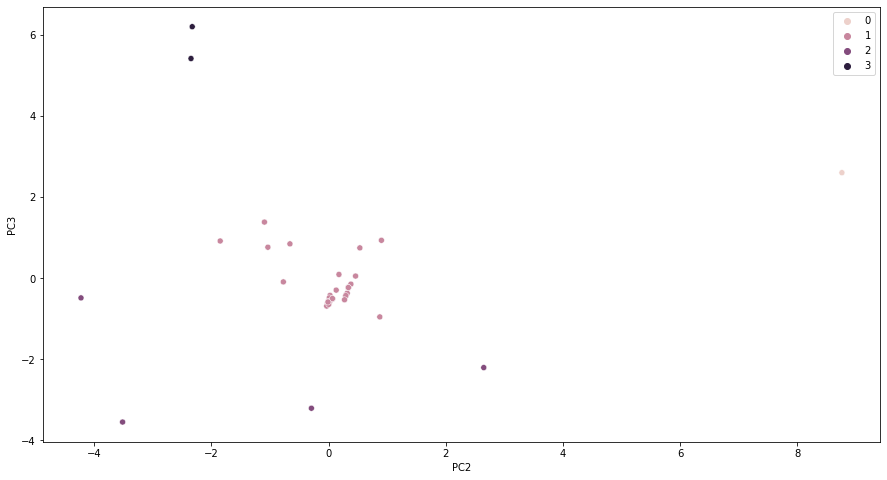

In [122]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC2', y='PC3', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

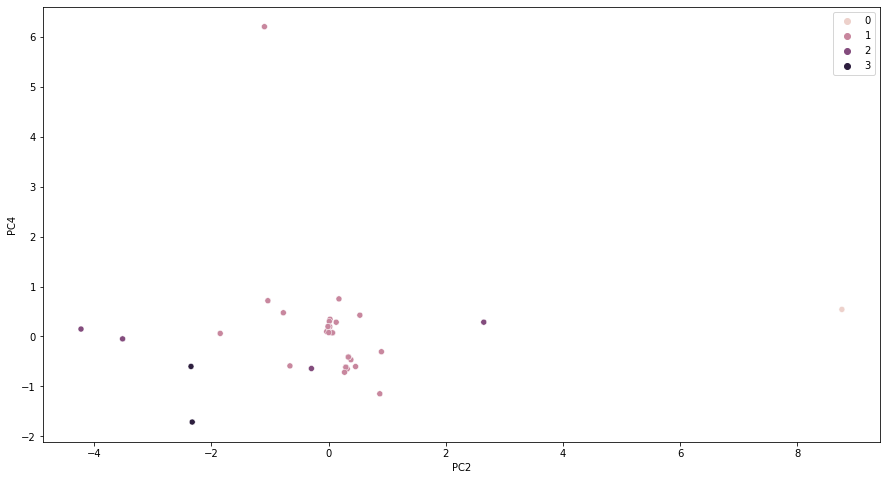

In [123]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC2', y='PC4', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

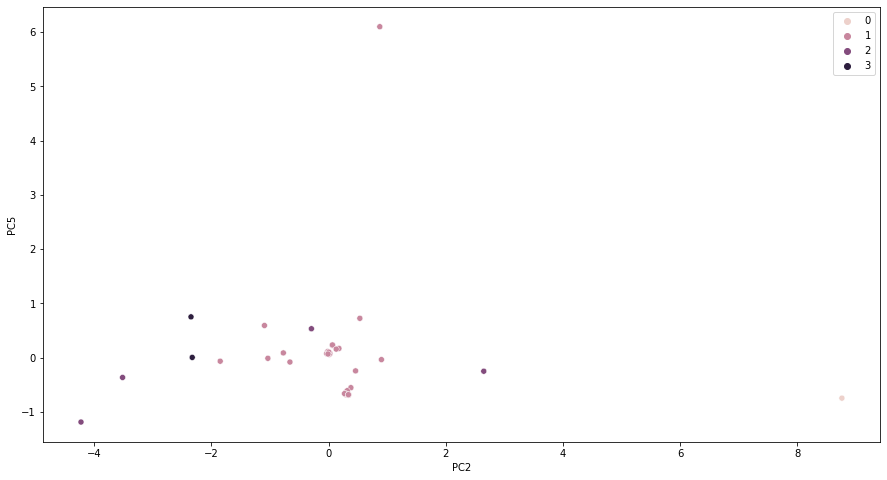

In [124]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC2', y='PC5', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

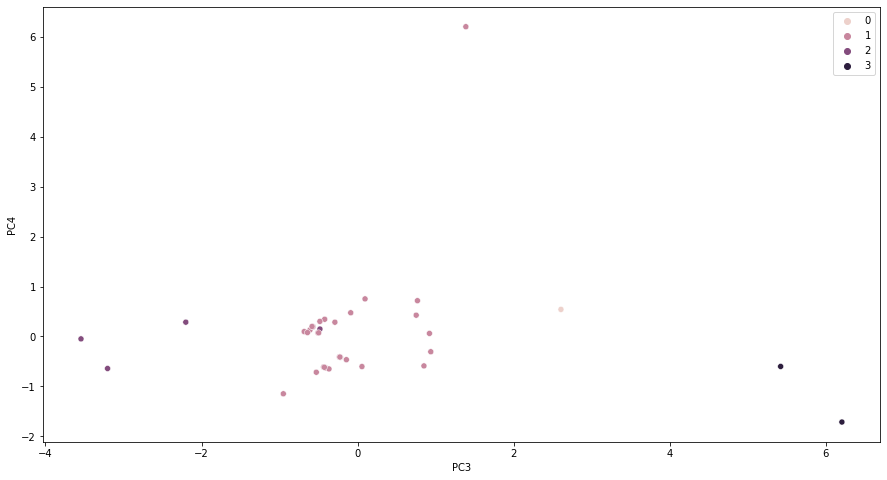

In [125]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC3', y='PC4', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

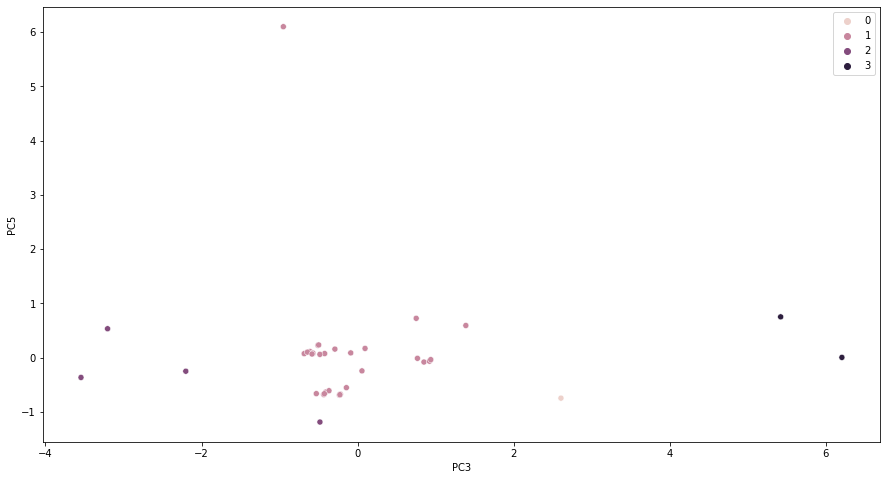

In [126]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC3', y='PC5', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

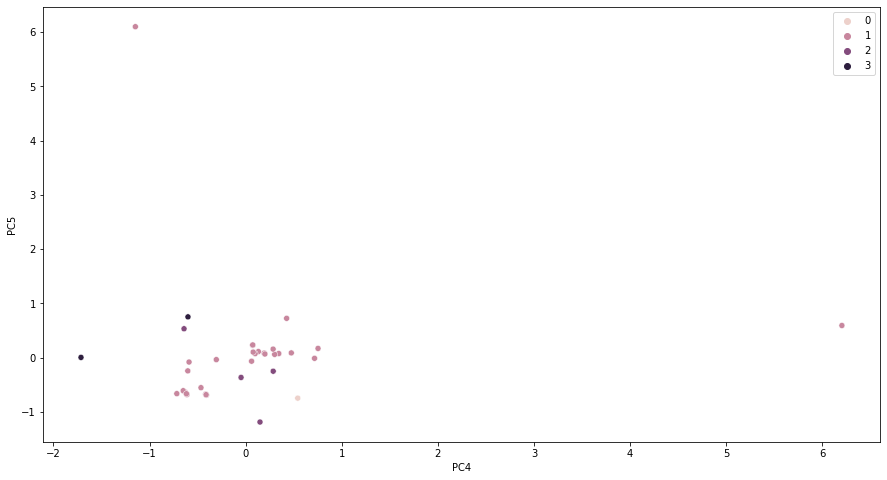

In [127]:
# Plot the Cluster with respect to the clusters obtained
plt.subplots(figsize=(15,8), sharex=True)
sns.scatterplot(x='PC4', y='PC5', hue='KClusterID', legend='full', data=dat_km)
plt.legend(loc='best')
plt.show()

# Cluster Profiling

In [131]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(dfTrace,dat_km, how='inner', on='token_name')
dat5.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,token_decimals,token_total_supply,Contract_address,PC1,PC2,PC3,PC4,PC5,PC6,KClusterID
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2.0,12923228.0,2,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942,1
1,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2.0,12923228.0,2,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052,1
2,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2.0,12923228.0,2,0.736259,-1.849073,0.920591,0.061425,-0.066339,-0.238302,1
3,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,2.0,12923228.0,1,-0.612640,-0.659243,0.849974,-0.588881,-0.081712,-1.593942,1
4,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,2.0,12923228.0,1,-1.298304,-0.771467,-0.088345,0.474958,0.086569,-0.599052,1


In [132]:
# Let's drop PCs from the data
dat5.drop(['PC1','PC2','PC3','PC4','PC5','PC6'],axis=1, inplace=True)
dat5.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,transaction_to_address,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address,KClusterID
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1
1,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1
2,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,2,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1
3,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,1,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1
4,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,1,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1


# BoxPlot on Cluster Profiled DataSet

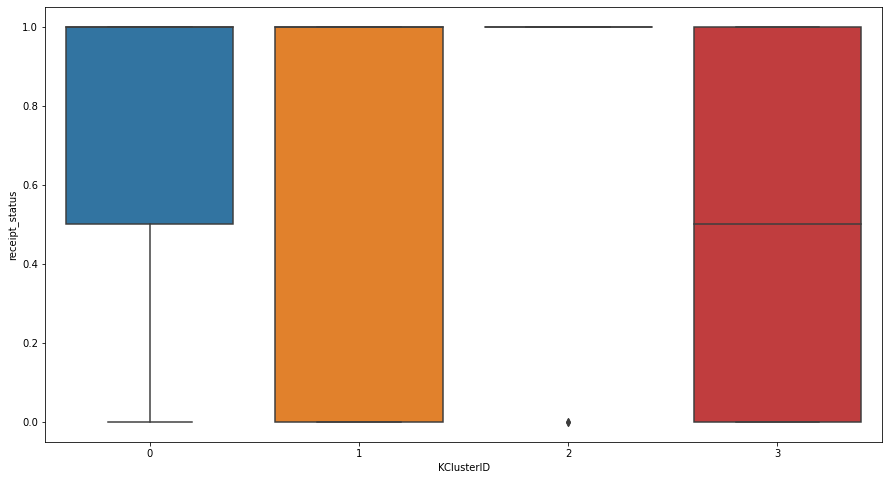

In [133]:
# Plot the Cluster with respect to the Child_mort
# value,gas,gas_used
plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="receipt_status",data=dat5)
plt.show()

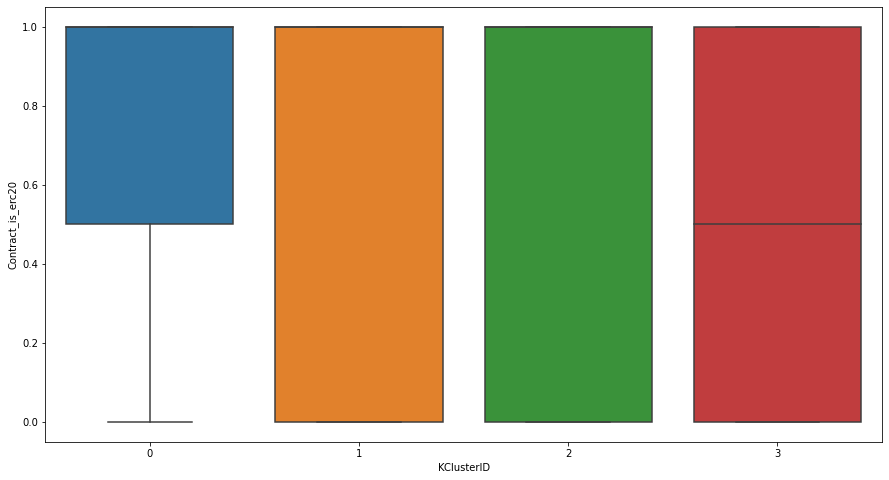

In [134]:
# Plot the Cluster with respect to the Child_mort
# value,gas,gas_used
plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="Contract_is_erc20",data=dat5)
plt.show()

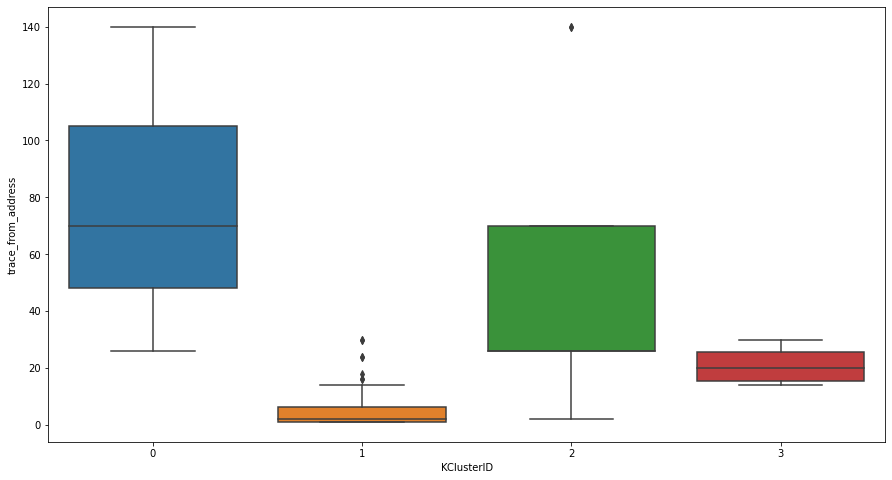

In [135]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="trace_from_address",data=dat5)
plt.show()


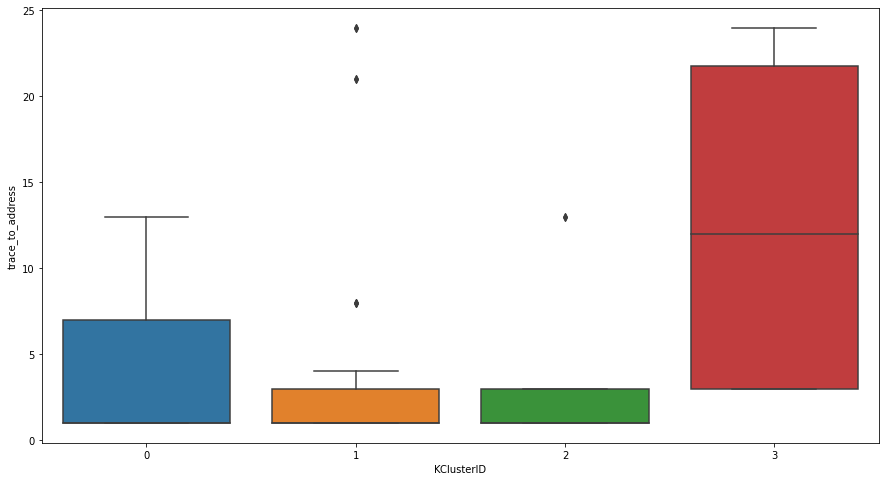

In [136]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="trace_to_address",data=dat5)
plt.show()


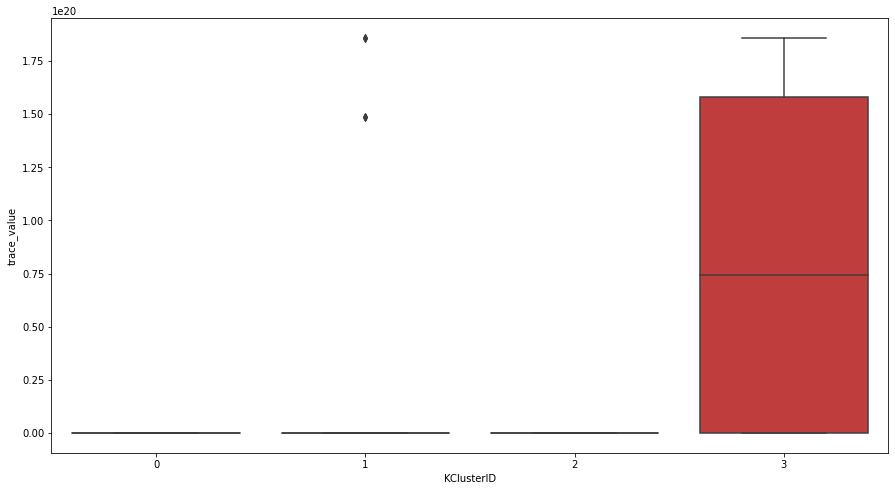

In [137]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="trace_value",data=dat5)
plt.show()


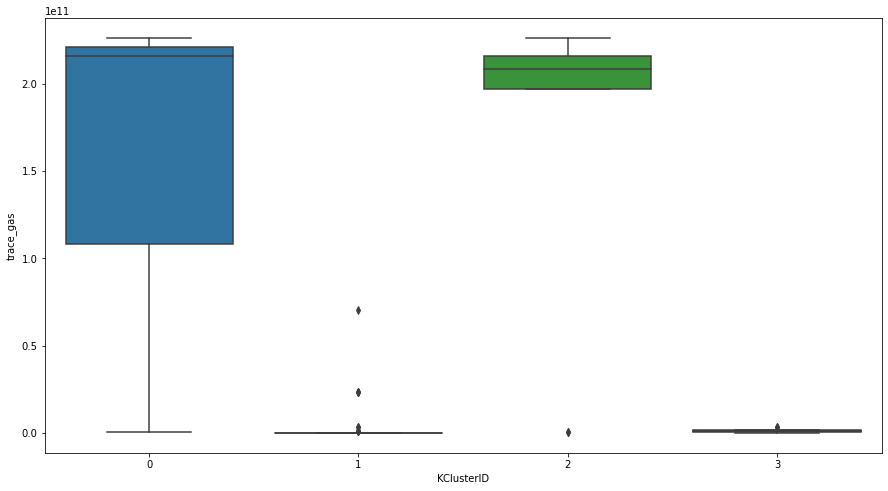

In [138]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="trace_gas",data=dat5)
plt.show()


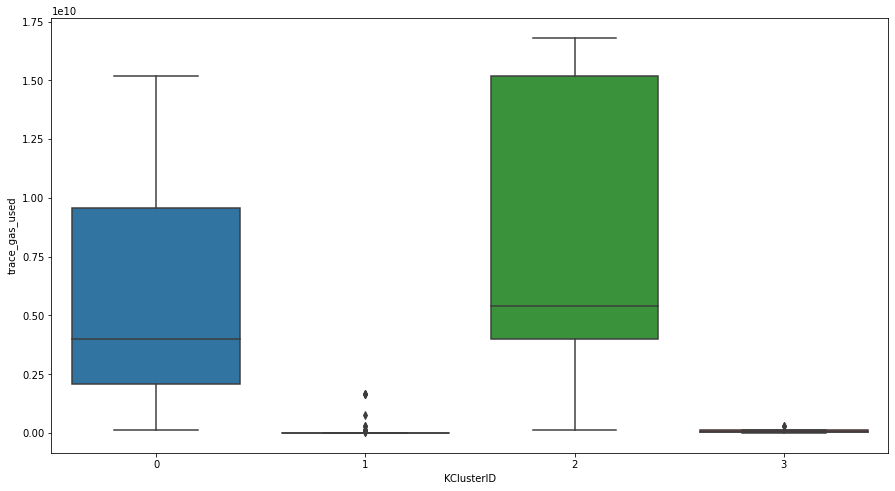

In [139]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="trace_gas_used",data=dat5)
plt.show()


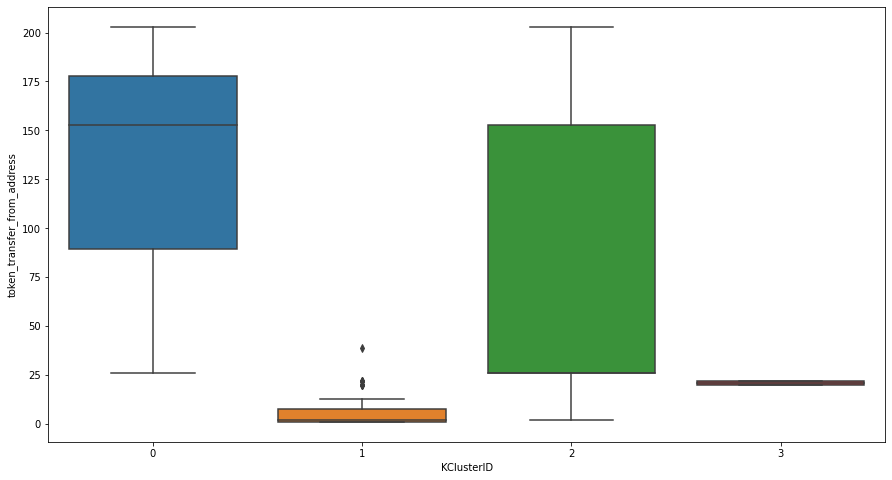

In [140]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="token_transfer_from_address",data=dat5)
plt.show()


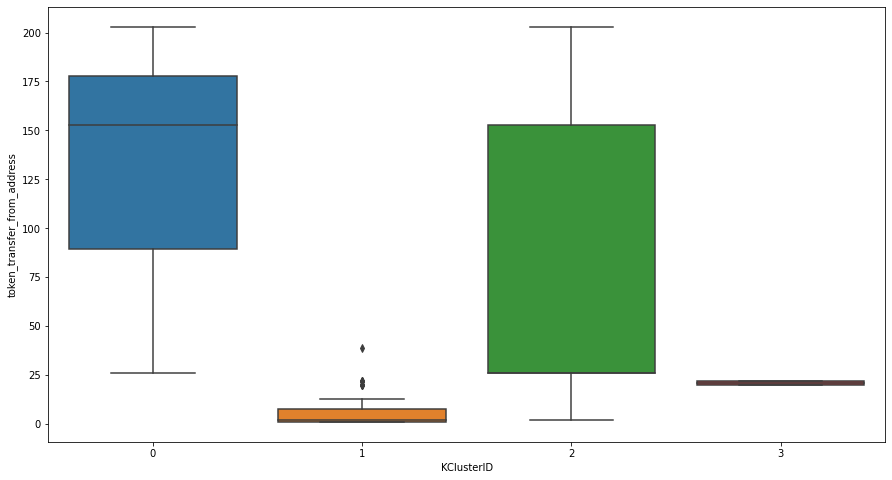

In [141]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="token_transfer_from_address",data=dat5)
plt.show()


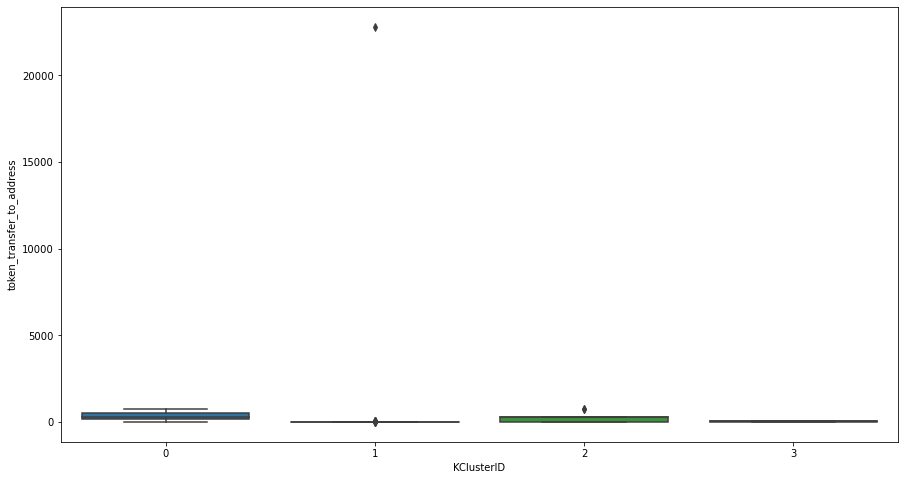

In [142]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="token_transfer_to_address",data=dat5)
plt.show()


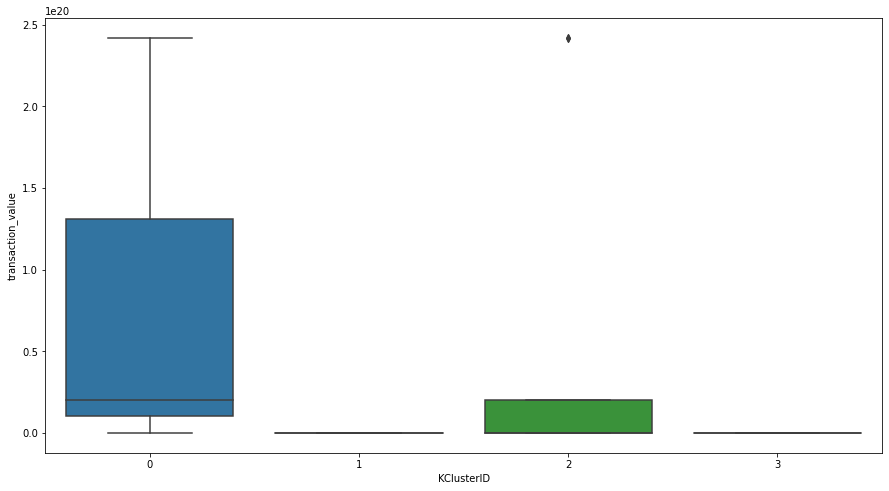

In [143]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="transaction_value",data=dat5)
plt.show()


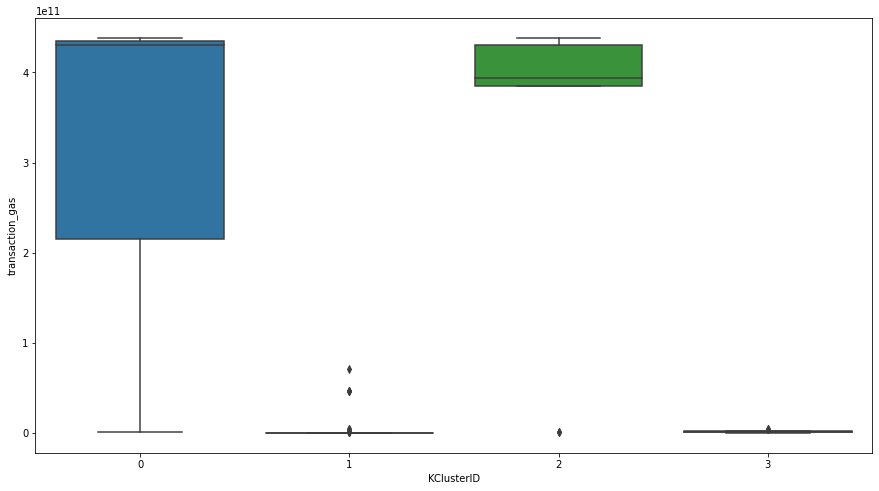

In [144]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="transaction_gas",data=dat5)
plt.show()


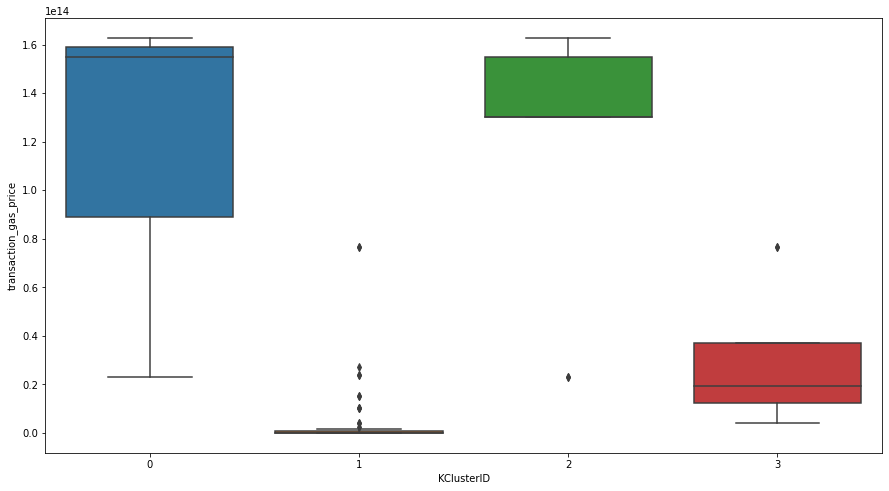

In [145]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="transaction_gas_price",data=dat5)
plt.show()


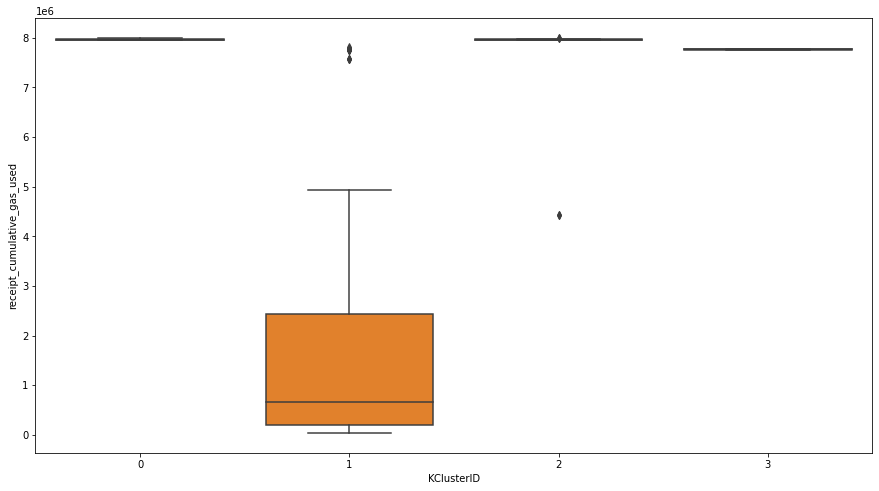

In [146]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="receipt_cumulative_gas_used",data=dat5)
plt.show()


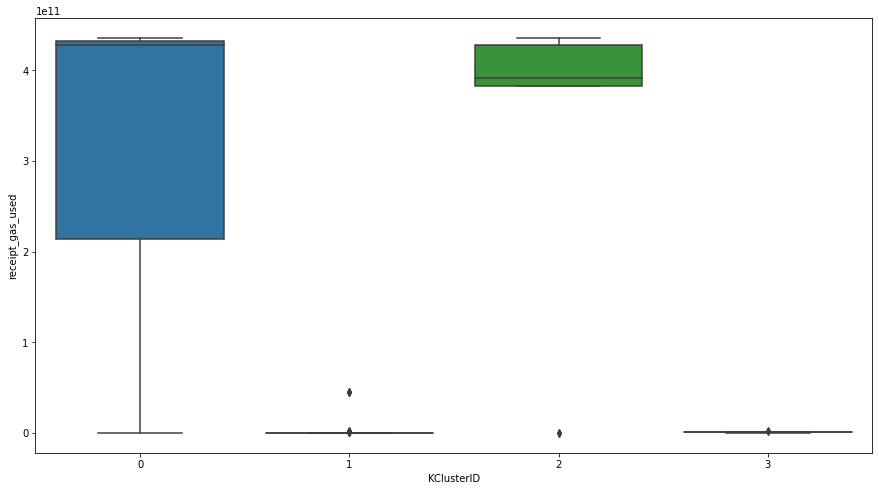

In [147]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="receipt_gas_used",data=dat5)
plt.show()


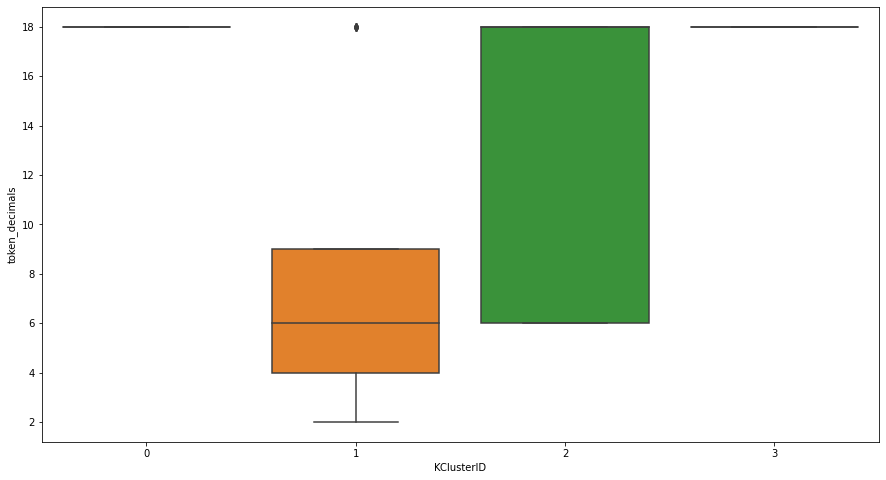

In [148]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="token_decimals",data=dat5)
plt.show()


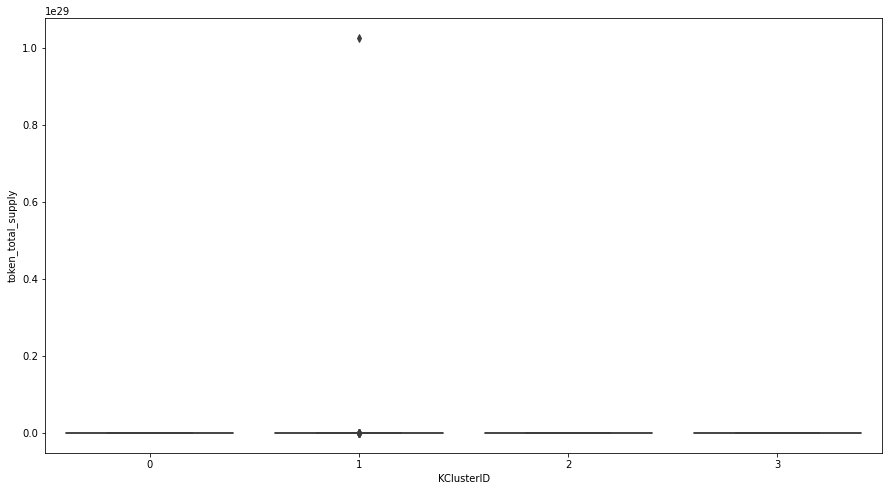

In [149]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="token_total_supply",data=dat5)
plt.show()


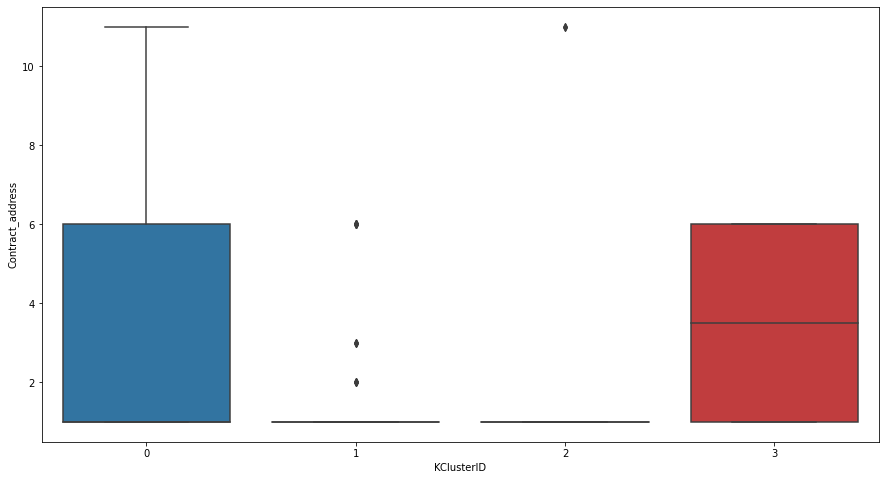

In [150]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="KClusterID", y="Contract_address",data=dat5)
plt.show()


# Hierarchical Clustering

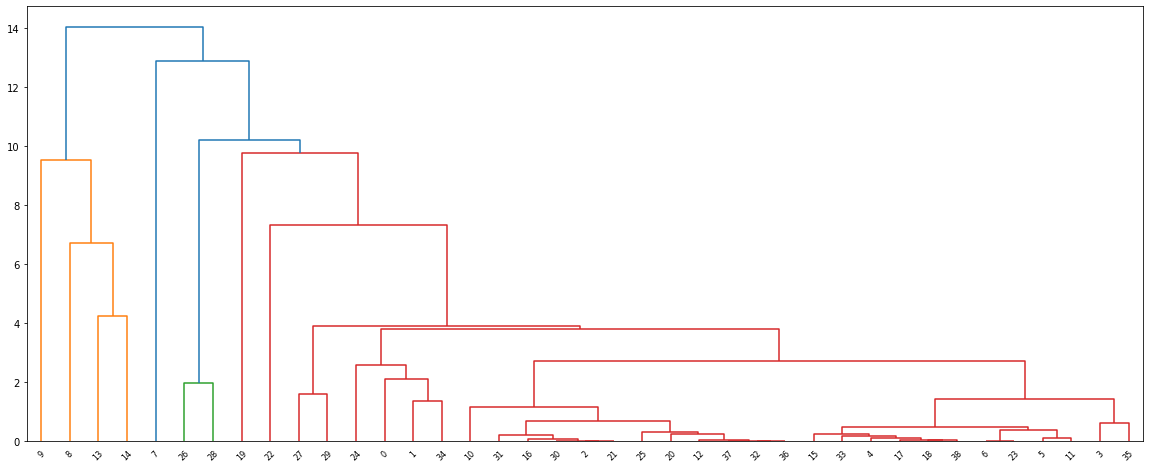

In [151]:
#Complete Linkage 
plt.subplots(figsize=(20,8), sharex=True)
mergings = linkage(dat3_1, method="complete", metric="euclidean")
dendrogram(mergings)
plt.show()


In [156]:
# 2 clusters
cluster_labels = cut_tree(mergings,n_clusters=4).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [157]:

dat5['HCluster_id'] = pd.DataFrame(cluster_labels)


In [158]:
dat5.head()

,token_name,receipt_status,Contract_is_erc20,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,...,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address,KClusterID,HCluster_id
0,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
1,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
2,Gastoken.io,0,0,4,4,0.0,127266471.0,125815805.0,2,1,...,0.0,256089852,69400000000,7567350,252218296,2.0,12923228.0,2,1,0.0
3,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0
4,Gastoken.io,1,0,4,2,0.0,4419811.0,1113697.0,3,3,...,0.0,5901184,12008000000,543034,3107288,2.0,12923228.0,1,1,0.0


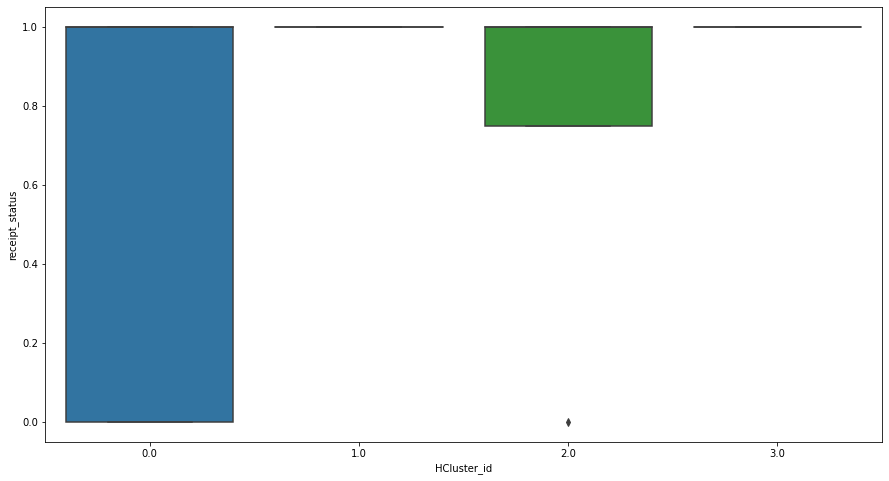

In [159]:
# Plot the Cluster with respect to the Child_mort
# value,gas,gas_used
plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="receipt_status",data=dat5)
plt.show()

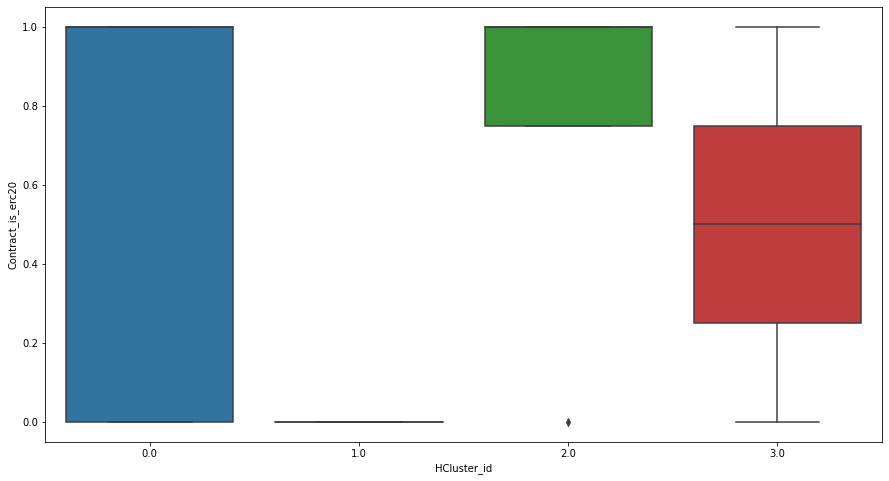

In [160]:
# Plot the Cluster with respect to the Child_mort
# value,gas,gas_used
plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="Contract_is_erc20",data=dat5)
plt.show()

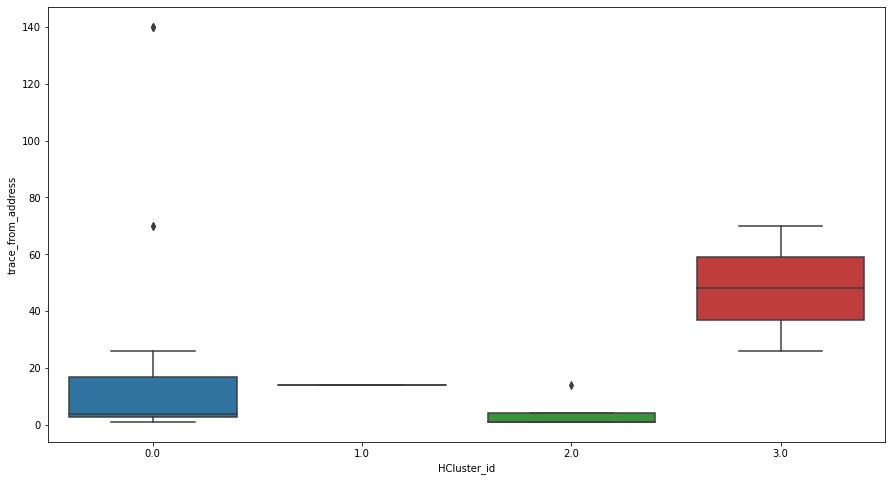

In [161]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="trace_from_address",data=dat5)
plt.show()


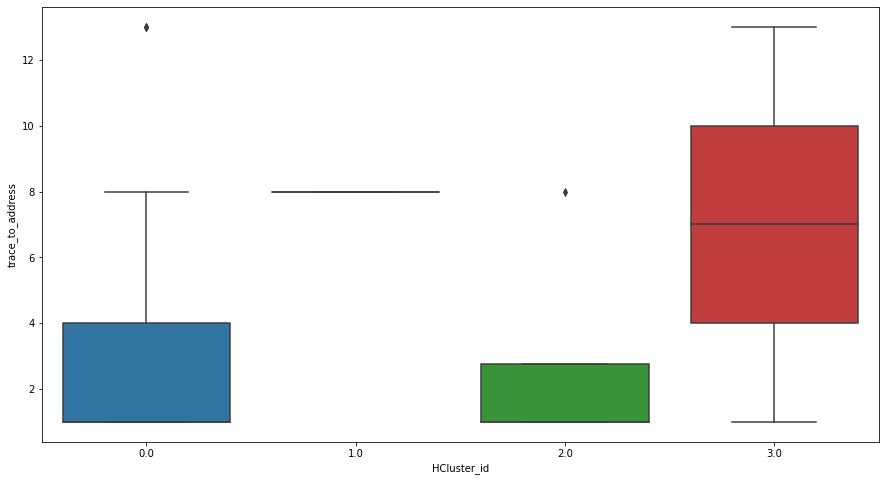

In [162]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="trace_to_address",data=dat5)
plt.show()


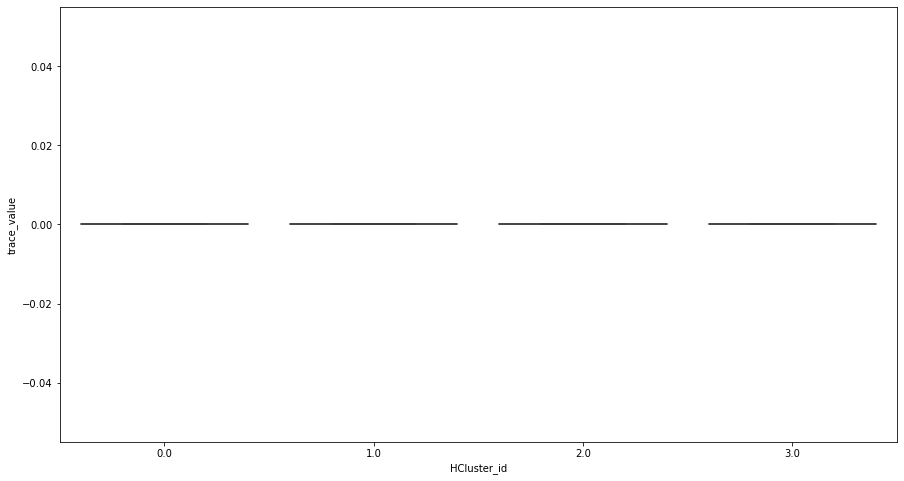

In [163]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="trace_value",data=dat5)
plt.show()


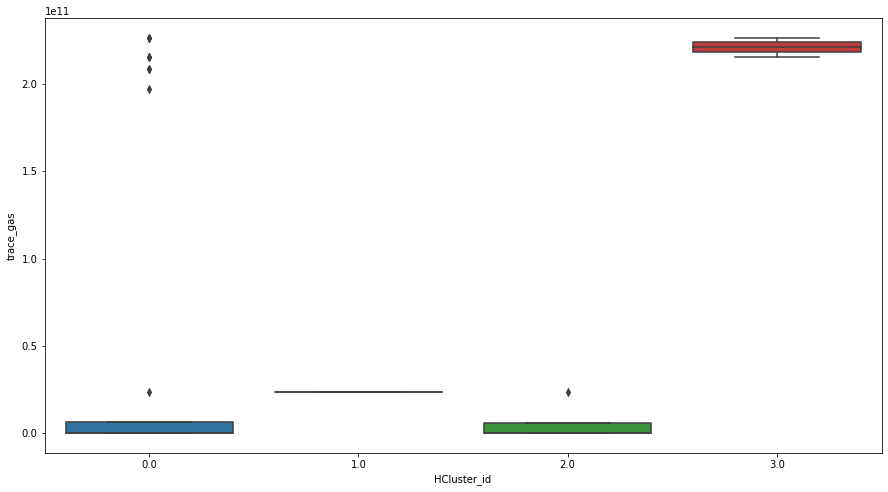

In [164]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="trace_gas",data=dat5)
plt.show()


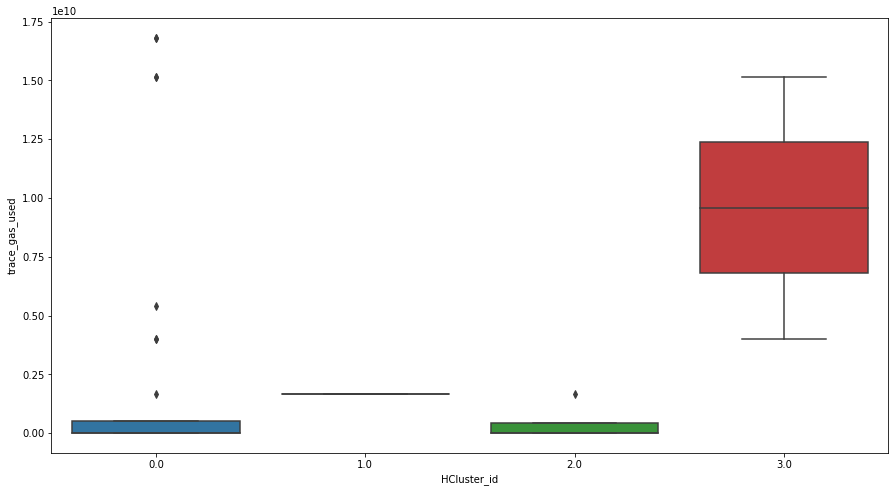

In [165]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="trace_gas_used",data=dat5)
plt.show()


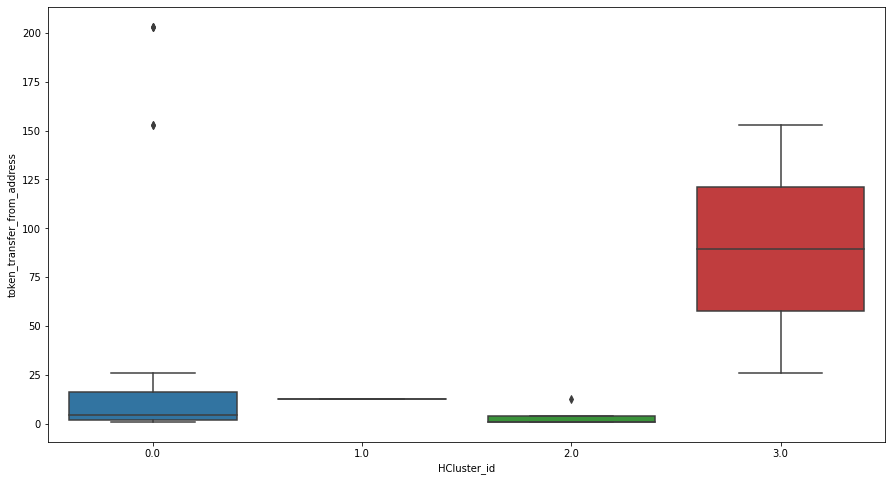

In [166]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="token_transfer_from_address",data=dat5)
plt.show()


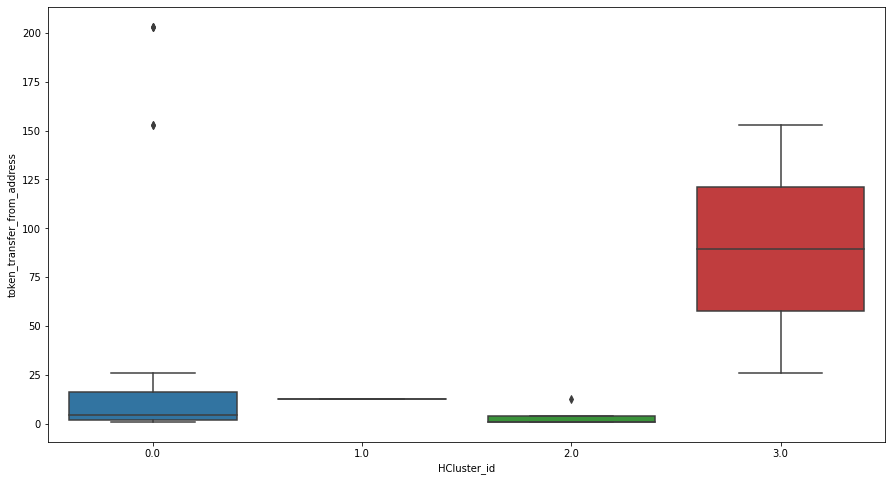

In [167]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="token_transfer_from_address",data=dat5)
plt.show()


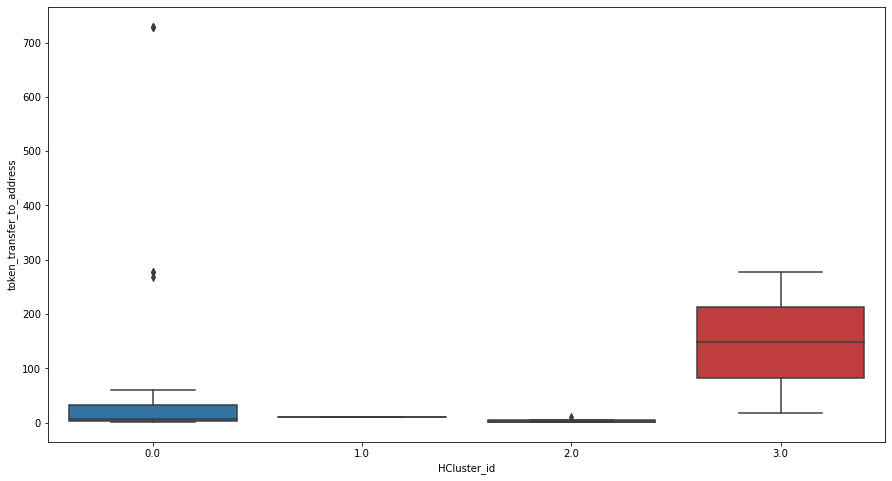

In [168]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="token_transfer_to_address",data=dat5)
plt.show()


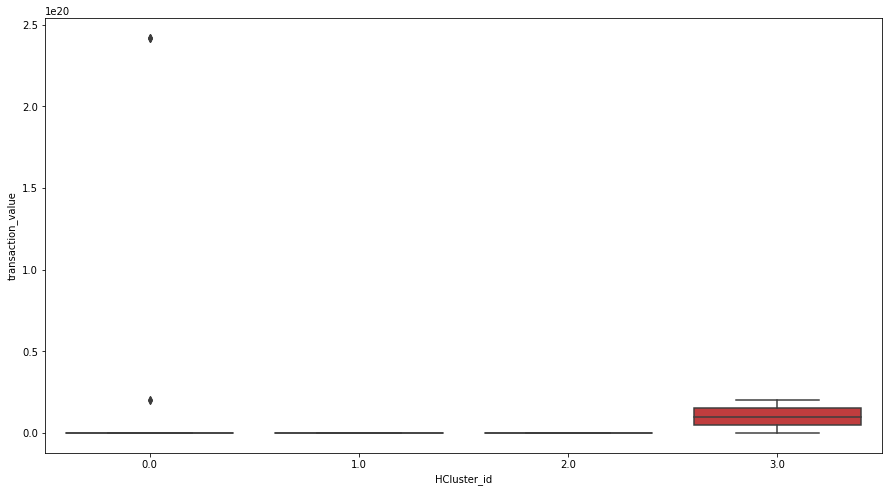

In [169]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="transaction_value",data=dat5)
plt.show()


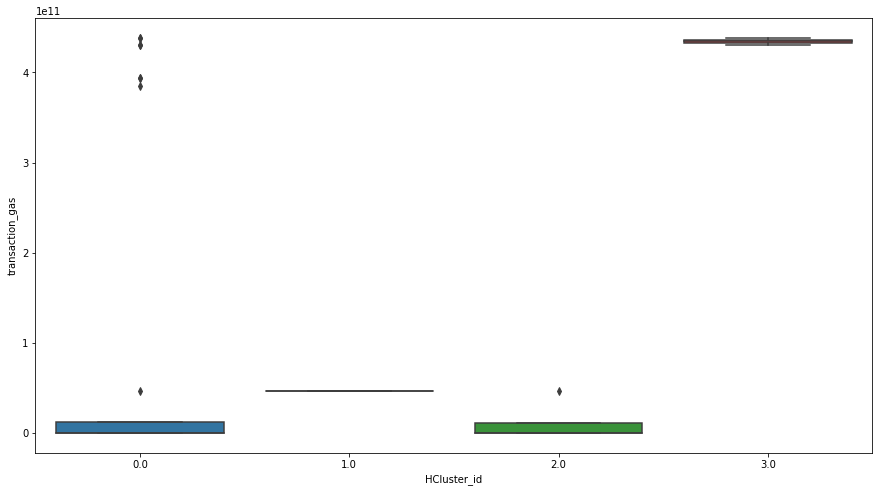

In [170]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="transaction_gas",data=dat5)
plt.show()


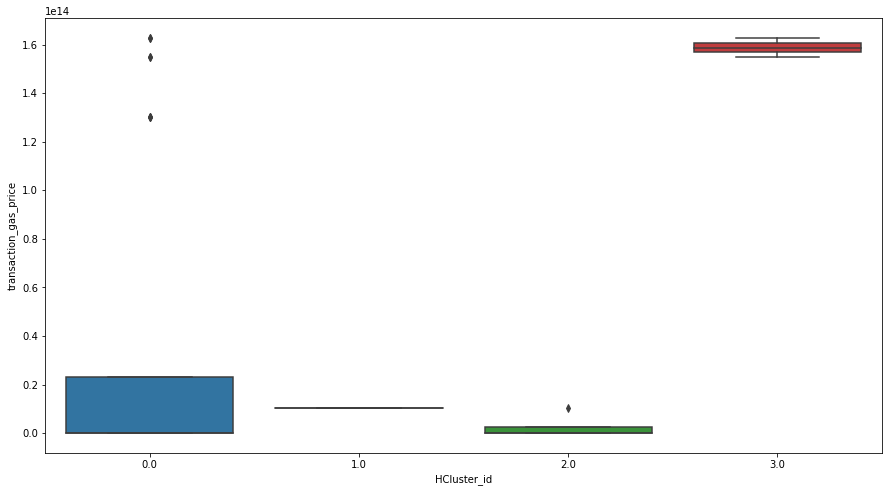

In [171]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="transaction_gas_price",data=dat5)
plt.show()


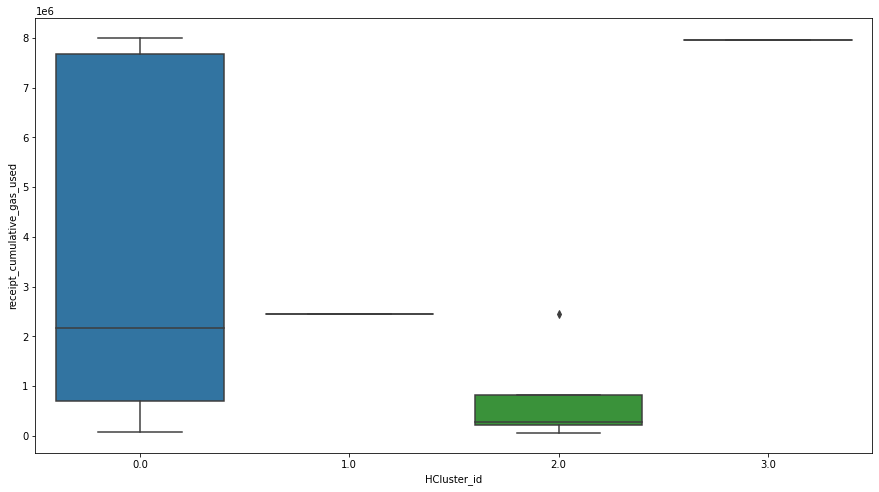

In [172]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="receipt_cumulative_gas_used",data=dat5)
plt.show()


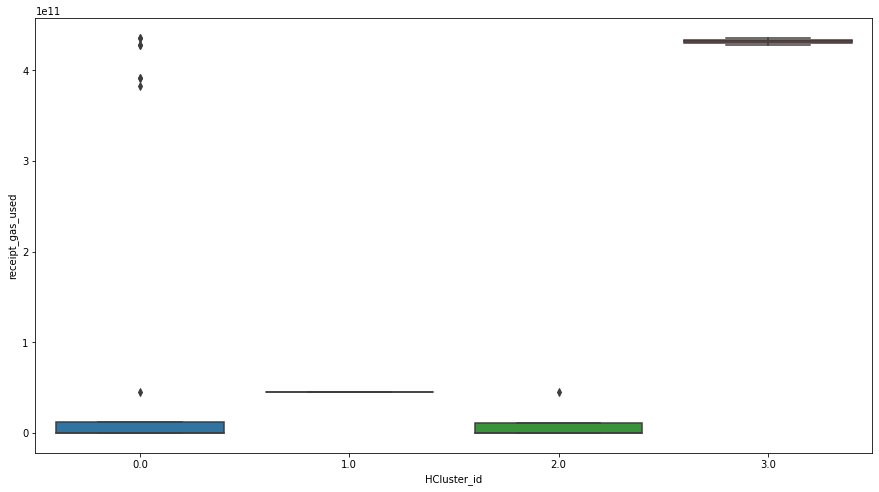

In [173]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="receipt_gas_used",data=dat5)
plt.show()


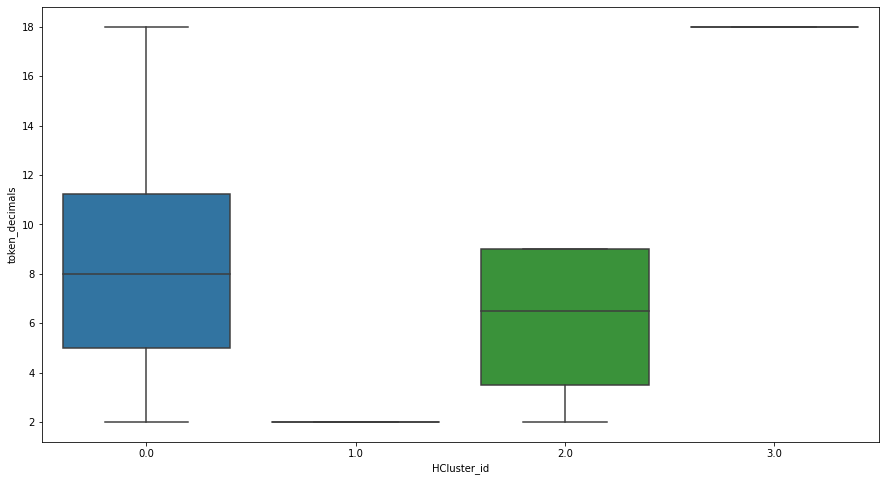

In [174]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="token_decimals",data=dat5)
plt.show()


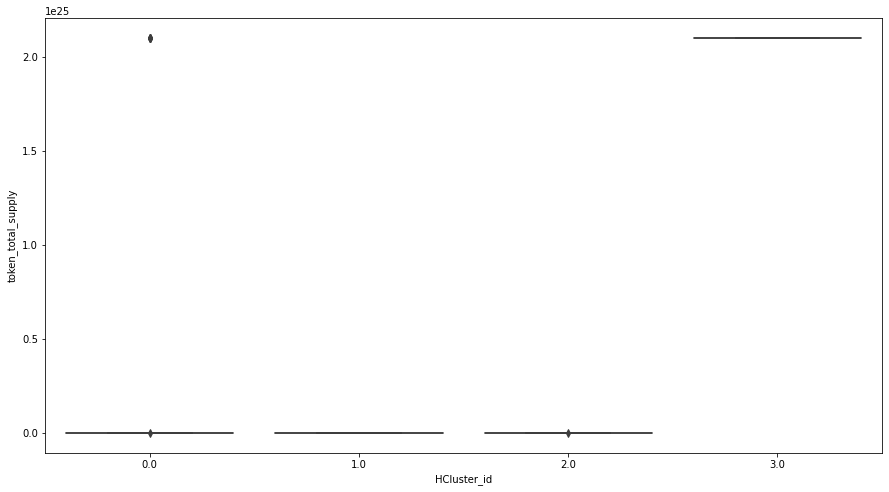

In [175]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="token_total_supply",data=dat5)
plt.show()


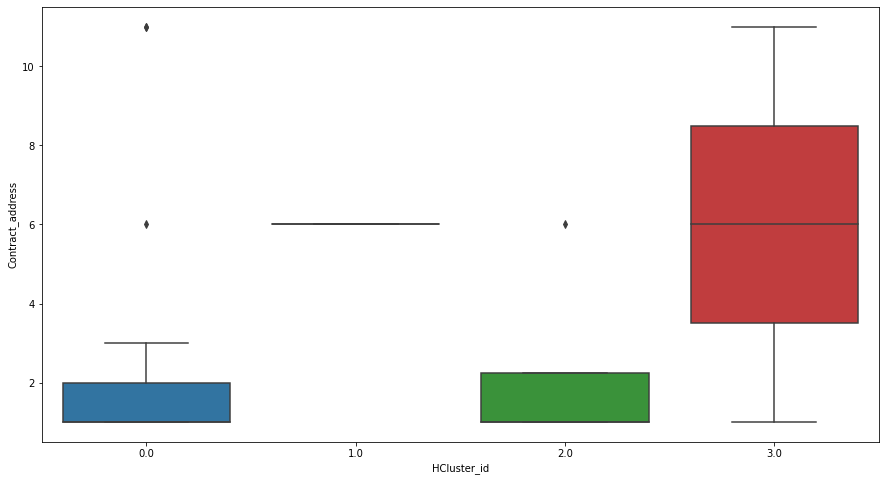

In [176]:
# Plot the Cluster with respect to the Child_mort

plt.subplots(figsize=(15,8), sharex=True)
sns.boxplot(x="HCluster_id", y="Contract_address",data=dat5)
plt.show()


In [177]:
# Let's profile the cluster by taking the mean of various attributes
df_Kmean = dat5.groupby(['KClusterID']).aggregate({'trace_from_address':'mean',
                                                   'trace_to_address':'mean',
                                                   'trace_value':'mean',
                                                   'trace_gas':'mean',
                                                   'trace_gas_used':'mean',
                                                   'token_transfer_from_address':'mean',
                                                   'token_transfer_to_address':'mean',
                                                   'token_transfer_value':'mean',
                                                   'transaction_from_address':'mean',
                                                   'transaction_to_address':'mean',
                                                   'transaction_value':'mean',
                                                   'transaction_gas':'mean',
                                                   'transaction_gas_price':'mean',
                                                   'receipt_cumulative_gas_used':'mean',
                                                   'receipt_gas_used':'mean',
                                                   'token_decimals':'mean',
                                                   'token_total_supply':'mean',
                                                   'Contract_address':'mean'})

In [178]:
df_Kmean

,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,token_transfer_value,transaction_from_address,transaction_to_address,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address
KClusterID,,,,,,,,,,,,,,,,,,
0,78.666667,5.000000,0.000000e+00,1.475625e+11,6.438628e+09,127.333333,341.666667,1.290424e+25,157.666667,9.333333,8.740292e+19,2.900019e+11,1.135293e+14,7.971934e+06,2.881082e+11,18.000000,2.099851e+25,4.333333
1,5.775862,3.362069,1.154545e+19,2.631723e+09,1.197422e+08,6.172414,402.672414,6.821245e+22,6.500000,2.172414,0.000000e+00,3.929970e+09,5.270091e+12,2.285139e+06,2.563329e+09,7.844828,1.769283e+27,1.775862
2,52.800000,3.800000,0.000000e+00,1.696585e+11,8.308320e+09,82.000000,259.200000,7.742543e+24,131.600000,6.600000,5.244175e+19,3.297380e+11,1.201629e+14,7.261966e+06,3.277910e+11,13.200000,1.259911e+25,3.000000
3,21.000000,12.750000,8.370451e+19,1.328895e+09,1.041273e+08,21.000000,33.000000,4.192900e+23,26.500000,4.500000,0.000000e+00,1.984918e+09,3.001900e+13,7.763076e+06,1.153563e+09,18.000000,0.000000e+00,3.500000


In [179]:
# Let's profile the cluster by taking the mean of various attributes
df_Hier = dat5.groupby(['HCluster_id']).aggregate({'trace_from_address':'mean',
                                                   'trace_to_address':'mean',
                                                   'trace_value':'mean',
                                                   'trace_gas':'mean',
                                                   'trace_gas_used':'mean',
                                                   'token_transfer_from_address':'mean',
                                                   'token_transfer_to_address':'mean',
                                                   'token_transfer_value':'mean',
                                                   'transaction_from_address':'mean',
                                                   'transaction_to_address':'mean',
                                                   'transaction_value':'mean',
                                                   'transaction_gas':'mean',
                                                   'transaction_gas_price':'mean',
                                                   'receipt_cumulative_gas_used':'mean',
                                                   'receipt_gas_used':'mean',
                                                   'token_decimals':'mean',
                                                   'token_total_supply':'mean',
                                                   'Contract_address':'mean'})

In [180]:
df_Hier

,trace_from_address,trace_to_address,trace_value,trace_gas,trace_gas_used,token_transfer_from_address,token_transfer_to_address,token_transfer_value,transaction_from_address,transaction_to_address,transaction_value,transaction_gas,transaction_gas_price,receipt_cumulative_gas_used,receipt_gas_used,token_decimals,token_total_supply,Contract_address
HCluster_id,,,,,,,,,,,,,,,,,,
0.0,22.78125,2.75,0.0,4.763597e+10,2.495597e+09,33.96875,101.8125,2.759879e+24,44.625,3.53125,2.394893e+19,9.252684e+10,3.471960e+13,3.757322e+06,9.193279e+10,9.03125,4.593456e+24,2.0625
1.0,14.00000,8.00,0.0,2.354895e+10,1.649938e+09,13.00000,11.0000,2.100131e+08,8.000,6.00000,0.000000e+00,4.657524e+10,1.035574e+13,2.443581e+06,4.576301e+10,2.00000,1.242977e+07,6.0000
2.0,4.25000,2.75,0.0,5.887513e+09,4.125168e+08,4.00000,3.7500,5.000000e+17,2.750,2.25000,0.000000e+00,1.164411e+10,2.600935e+12,7.616730e+05,1.144087e+10,6.00000,2.500000e+17,2.2500
3.0,48.00000,7.00,0.0,2.210517e+11,9.585668e+09,89.50000,148.0000,1.391100e+25,125.500,12.50000,1.013036e+19,4.346343e+11,1.587728e+14,7.958083e+06,4.319662e+11,18.00000,2.099851e+25,6.0000


In [181]:
dat5.to_csv('/Users/rparama/Downloads/Dataset/EtherClusterV2.csv',index=False)